## **Adir Barash AND Hadar Zilkha**
**https://www.kaggle.com/adirbarash**

## **The Challenge**
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1,502 out of 2,224 passengers and crew.

While luck played a role in survival, certain groups of people were statistically more likely to survive than others.

In this challenge, we aim to build a predictive model to answer the question: “What sorts of people were more likely to survive?” using passenger data such as name, age, gender, socio-economic class, and other relevant features.

**In this notebook, we will:**

**Analyze the provided data.**

**Engineer new features that might be useful for the model.**

**Train a machine learning model to predict survival based on these features.**

**Let's dive in!**

In [1]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# sklearn imports
import sklearn
from sklearn import datasets
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import ParameterGrid, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, log_loss

# imort seaborn and draw regression joint plot
import seaborn as sns

# define plt settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (12, 10)
plt.rcParams["legend.title_fontsize"] = 20

In [2]:
# load the insurance csv file
titanic_train_df = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")
submission = pd.read_csv("gender_submission.csv")

titanic_train_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

## Data Cleansing  
The first thing to do, is to **check for empty values.**

In [3]:
#copy the data set to keep the original file
titanic_train_cp_df = titanic_train_df.copy()
# detect np.NaN values in the df
np.where(titanic_train_cp_df.isnull())

(array([  0,   2,   4,   5,   5,   7,   8,   9,  12,  13,  14,  15,  16,
         17,  17,  18,  19,  19,  20,  22,  24,  25,  26,  26,  28,  28,
         29,  29,  30,  31,  32,  32,  33,  34,  35,  36,  36,  37,  38,
         39,  40,  41,  42,  42,  43,  44,  45,  45,  46,  46,  47,  47,
         48,  48,  49,  50,  51,  53,  55,  56,  57,  58,  59,  60,  61,
         63,  64,  64,  65,  65,  67,  68,  69,  70,  71,  72,  73,  74,
         76,  76,  77,  77,  78,  79,  80,  81,  82,  82,  83,  84,  85,
         86,  87,  87,  89,  90,  91,  93,  94,  95,  95,  98,  99, 100,
        101, 101, 103, 104, 105, 106, 107, 107, 108, 109, 109, 111, 112,
        113, 114, 115, 116, 117, 119, 120, 121, 121, 122, 125, 126, 126,
        127, 128, 129, 130, 131, 132, 133, 134, 135, 138, 140, 140, 141,
        142, 143, 144, 145, 146, 147, 149, 150, 152, 153, 154, 154, 155,
        156, 157, 158, 158, 159, 159, 160, 161, 162, 163, 164, 165, 166,
        167, 168, 168, 169, 171, 172, 173, 175, 176

In [4]:
# print the type of the columns
titanic_train_cp_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Let's translate all the empty values to `np.NaN` values (Pandas works best with these values).  

In [5]:
# replace all empty values to np.NaN values
titanic_train_cp_df.replace('', np.NaN, inplace=True)
titanic_train_cp_df.fillna(np.NaN, inplace=True)
titanic_train_cp_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

Let's see the empty values (rows, cols).  

In [6]:
# detect np.NaN or None values in the copy of df
print(f'There are {len(np.where(titanic_train_cp_df.isnull())[0])} empty values in the dataframe')
print(np.where(titanic_train_cp_df.isnull()))

There are 866 empty values in the dataframe
(array([  0,   2,   4,   5,   5,   7,   8,   9,  12,  13,  14,  15,  16,
        17,  17,  18,  19,  19,  20,  22,  24,  25,  26,  26,  28,  28,
        29,  29,  30,  31,  32,  32,  33,  34,  35,  36,  36,  37,  38,
        39,  40,  41,  42,  42,  43,  44,  45,  45,  46,  46,  47,  47,
        48,  48,  49,  50,  51,  53,  55,  56,  57,  58,  59,  60,  61,
        63,  64,  64,  65,  65,  67,  68,  69,  70,  71,  72,  73,  74,
        76,  76,  77,  77,  78,  79,  80,  81,  82,  82,  83,  84,  85,
        86,  87,  87,  89,  90,  91,  93,  94,  95,  95,  98,  99, 100,
       101, 101, 103, 104, 105, 106, 107, 107, 108, 109, 109, 111, 112,
       113, 114, 115, 116, 117, 119, 120, 121, 121, 122, 125, 126, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 138, 140, 140, 141,
       142, 143, 144, 145, 146, 147, 149, 150, 152, 153, 154, 154, 155,
       156, 157, 158, 158, 159, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 16

Counting how many empty values we have in each column

In [7]:
# using .isna()
titanic_train_cp_df.isna().sum()
# using .isnull()
titanic_train_cp_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
## **Preprocessing on train**

## **Handling Missing Values And Removing Redundant Features**
**Age** - Mean values.

**Embarked** - Random values. 

**Cabin** - because most values are missing we will remove this feature from the dataset.

**Name and Ticket** - string that doesnt indicate anything

**Data Visualization With Plotly**

To complete the empty values in each column, we need to get some data on the column.  
Let's start with the categorical columns.  

In [9]:
#dropping the features
titanic_train_cp_df = titanic_train_cp_df.drop(['Cabin','Name','Ticket'], axis=1)

titanic_train_cp_df

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female   NaN      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       ...  
886        S  
887        S  
888        S  
889        C  
890        Q  

[891 rows x 9 columns]

In [10]:
# group by
column_name = 'Embarked'
mask = titanic_train_cp_df[column_name].isnull()
df_not_null = titanic_train_cp_df[~mask] # filter out the null values
# size returns Series where, set index by reset_index and convert to df
df_not_null.groupby([column_name]).size().reset_index(name='count')

Embarked  count
0        C    168
1        Q     77
2        S    644

In [11]:
# import px and create pie charts for each categorical feature
import plotly.express as px
def create_pie_chart_of_count(df, column_name):
    #create mask of all null values in provided column name
    mask = df[column_name].isnull()
    df_not_null = df[~mask]
    # create pie chart using px.pie
    fig = px.pie(
                  df_not_null.groupby([column_name]).size().reset_index(name='count'),
                  names=column_name,
                  values='count')
    fig.show()

create_pie_chart_of_count(titanic_train_cp_df, 'Embarked')


### **Insereting missing values ** 
**we will randomly pick one of the values for 'Embarked' feature, and pick the mean for the 'Age' feature** 

In [12]:
# fill empty values in the dataframe
def fill_na_mean(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].mean(), inplace=True) 

def fill_na_random_pick_column_distribution(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    # use lambda func to choose randomly from
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)

fill_na_mean(titanic_train_cp_df, 'Age')
fill_na_random_pick_column_distribution(titanic_train_cp_df, 'Embarked')


titanic_train_cp_df

C:\Users\97250.ADIRB\AppData\Local\Temp\ipykernel_24616\148427714.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





PassengerId  Survived  Pclass     Sex        Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.000000      1      0   7.2500   
1              2         1       1  female  38.000000      1      0  71.2833   
2              3         1       3  female  26.000000      0      0   7.9250   
3              4         1       1  female  35.000000      1      0  53.1000   
4              5         0       3    male  35.000000      0      0   8.0500   
..           ...       ...     ...     ...        ...    ...    ...      ...   
886          887         0       2    male  27.000000      0      0  13.0000   
887          888         1       1  female  19.000000      0      0  30.0000   
888          889         0       3  female  29.699118      1      2  23.4500   
889          890         1       1    male  26.000000      0      0  30.0000   
890          891         0       3    male  32.000000      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       ...  
886        S  
887        S  
888        S  
889        C  
890        Q  

[891 rows x 9 columns]

In [13]:
# check for empty values
# using .isna()
titanic_train_cp_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

## Data Pre-processing

We will do for the categorial data feature encoding.  
We will prepare the encoding now and use it later.

In [14]:
# prepare OneHotEncoder, DummyEncoder and OrdinalEncoder for latter use
titanic_train_df_cat = titanic_train_cp_df[['Embarked','Sex']]
de = OneHotEncoder(drop="first", sparse_output=False).fit(titanic_train_cp_df[['Embarked','Sex']])
titanic_train_cp_de_df = pd.DataFrame(de.fit_transform(titanic_train_df_cat),columns=de.get_feature_names_out(['Embarked','Sex']))


In [15]:
titanic_train_cp_de_df

Embarked_Q  Embarked_S  Sex_male
0           0.0         1.0       1.0
1           0.0         0.0       0.0
2           0.0         1.0       0.0
3           0.0         1.0       0.0
4           0.0         1.0       1.0
..          ...         ...       ...
886         0.0         1.0       1.0
887         0.0         1.0       0.0
888         0.0         1.0       0.0
889         0.0         0.0       1.0
890         1.0         0.0       1.0

[891 rows x 3 columns]

In [16]:
# join two df per encoder- add columns
titanic_train_cp_de_cp_df = titanic_train_cp_df.drop(['Embarked', 'Sex'], axis=1).join(titanic_train_cp_de_df)
titanic_train_cp_de_cp_df


PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare  \
0              1         0       3  22.000000      1      0   7.2500   
1              2         1       1  38.000000      1      0  71.2833   
2              3         1       3  26.000000      0      0   7.9250   
3              4         1       1  35.000000      1      0  53.1000   
4              5         0       3  35.000000      0      0   8.0500   
..           ...       ...     ...        ...    ...    ...      ...   
886          887         0       2  27.000000      0      0  13.0000   
887          888         1       1  19.000000      0      0  30.0000   
888          889         0       3  29.699118      1      2  23.4500   
889          890         1       1  26.000000      0      0  30.0000   
890          891         0       3  32.000000      0      0   7.7500   

     Embarked_Q  Embarked_S  Sex_male  
0           0.0         1.0       1.0  
1           0.0         0.0       0.0  
2           0.0         1.0       0.0  
3           0.0         1.0       0.0  
4           0.0         1.0       1.0  
..          ...         ...       ...  
886         0.0         1.0       1.0  
887         0.0         1.0       0.0  
888         0.0         1.0       0.0  
889         0.0         0.0       1.0  
890         1.0         0.0       1.0  

[891 rows x 10 columns]

### **Test Data Cleansing and Preprocessing**

In [17]:
test_cp = test.copy()

# replace all empty values to np.NaN values
test_cp.replace('', np.NaN, inplace=True)
test_cp.fillna(np.NaN, inplace=True)
test_cp.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
test_cp = test_cp.drop(['Cabin','Name','Ticket'], axis=1)
test_cp

PassengerId  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0            892       3    male  34.5      0      0    7.8292        Q
1            893       3  female  47.0      1      0    7.0000        S
2            894       2    male  62.0      0      0    9.6875        Q
3            895       3    male  27.0      0      0    8.6625        S
4            896       3  female  22.0      1      1   12.2875        S
..           ...     ...     ...   ...    ...    ...       ...      ...
413         1305       3    male   NaN      0      0    8.0500        S
414         1306       1  female  39.0      0      0  108.9000        C
415         1307       3    male  38.5      0      0    7.2500        S
416         1308       3    male   NaN      0      0    8.0500        S
417         1309       3    male   NaN      1      1   22.3583        C

[418 rows x 8 columns]

In [19]:
fill_na_mean(test_cp, 'Age')
#there is a fare missing value we will put the mean
fill_na_mean(test_cp, 'Fare')

fill_na_random_pick_column_distribution(test_cp, 'Embarked')

C:\Users\97250.ADIRB\AppData\Local\Temp\ipykernel_24616\148427714.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [20]:
test_cp.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [21]:
# prepare OneHotEncoder, DummyEncoder and OrdinalEncoder for latter use
test_cat = test_cp[['Embarked','Sex']]
de = OneHotEncoder(drop="first", sparse_output=False).fit(test_cp[['Embarked','Sex']])
test_de = pd.DataFrame(de.fit_transform(test_cat),columns=de.get_feature_names_out(['Embarked','Sex']))


In [22]:
test_de

Embarked_Q  Embarked_S  Sex_male
0           1.0         0.0       1.0
1           0.0         1.0       0.0
2           1.0         0.0       1.0
3           0.0         1.0       1.0
4           0.0         1.0       0.0
..          ...         ...       ...
413         0.0         1.0       1.0
414         0.0         0.0       0.0
415         0.0         1.0       1.0
416         0.0         1.0       1.0
417         0.0         0.0       1.0

[418 rows x 3 columns]

In [23]:
# join two df per encoder- add columns
test_cp_df = test_cp.drop(['Embarked', 'Sex'], axis=1).join(test_de)
test_cp_df

PassengerId  Pclass       Age  SibSp  Parch      Fare  Embarked_Q  \
0            892       3  34.50000      0      0    7.8292         1.0   
1            893       3  47.00000      1      0    7.0000         0.0   
2            894       2  62.00000      0      0    9.6875         1.0   
3            895       3  27.00000      0      0    8.6625         0.0   
4            896       3  22.00000      1      1   12.2875         0.0   
..           ...     ...       ...    ...    ...       ...         ...   
413         1305       3  30.27259      0      0    8.0500         0.0   
414         1306       1  39.00000      0      0  108.9000         0.0   
415         1307       3  38.50000      0      0    7.2500         0.0   
416         1308       3  30.27259      0      0    8.0500         0.0   
417         1309       3  30.27259      1      1   22.3583         0.0   

     Embarked_S  Sex_male  
0           0.0       1.0  
1           1.0       0.0  
2           0.0       1.0  
3           1.0       1.0  
4           1.0       0.0  
..          ...       ...  
413         1.0       1.0  
414         0.0       0.0  
415         1.0       1.0  
416         1.0       1.0  
417         0.0       1.0  

[418 rows x 9 columns]

## **Data Analysis**

<Axes: >

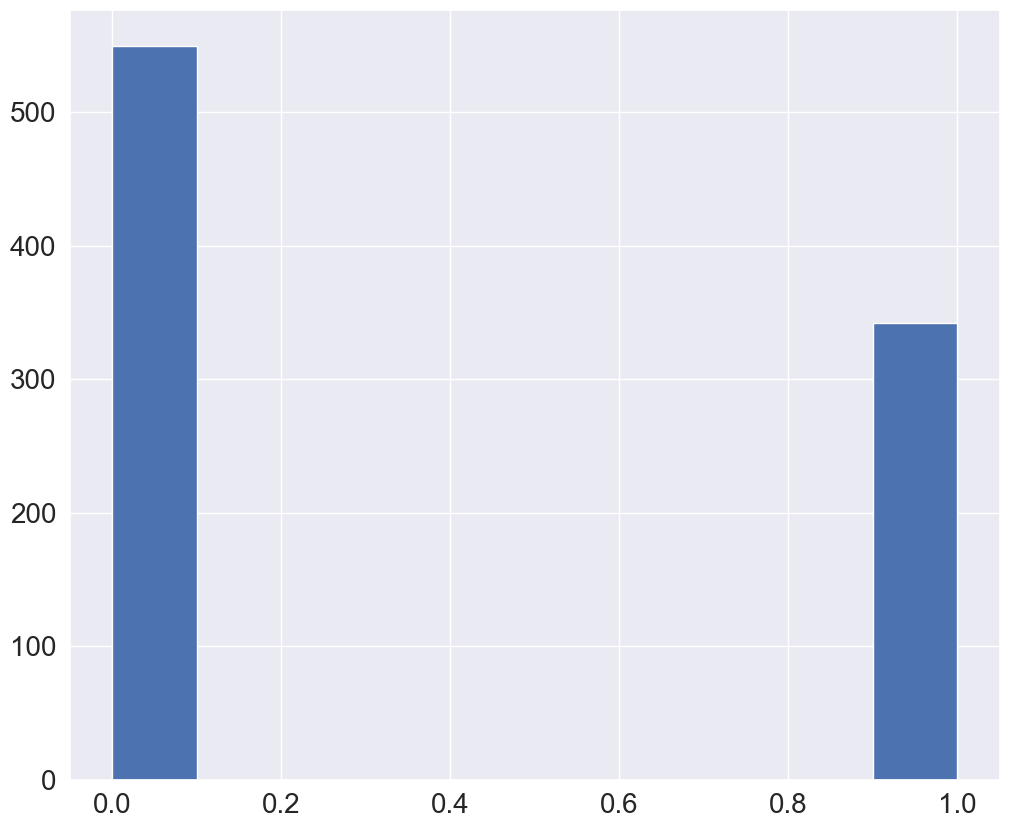

In [24]:
titanic_train_cp_de_cp_df['Survived'].hist()

In [25]:
titanic_train_cp_de_cp_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Figure size 1200x1000 with 0 Axes>

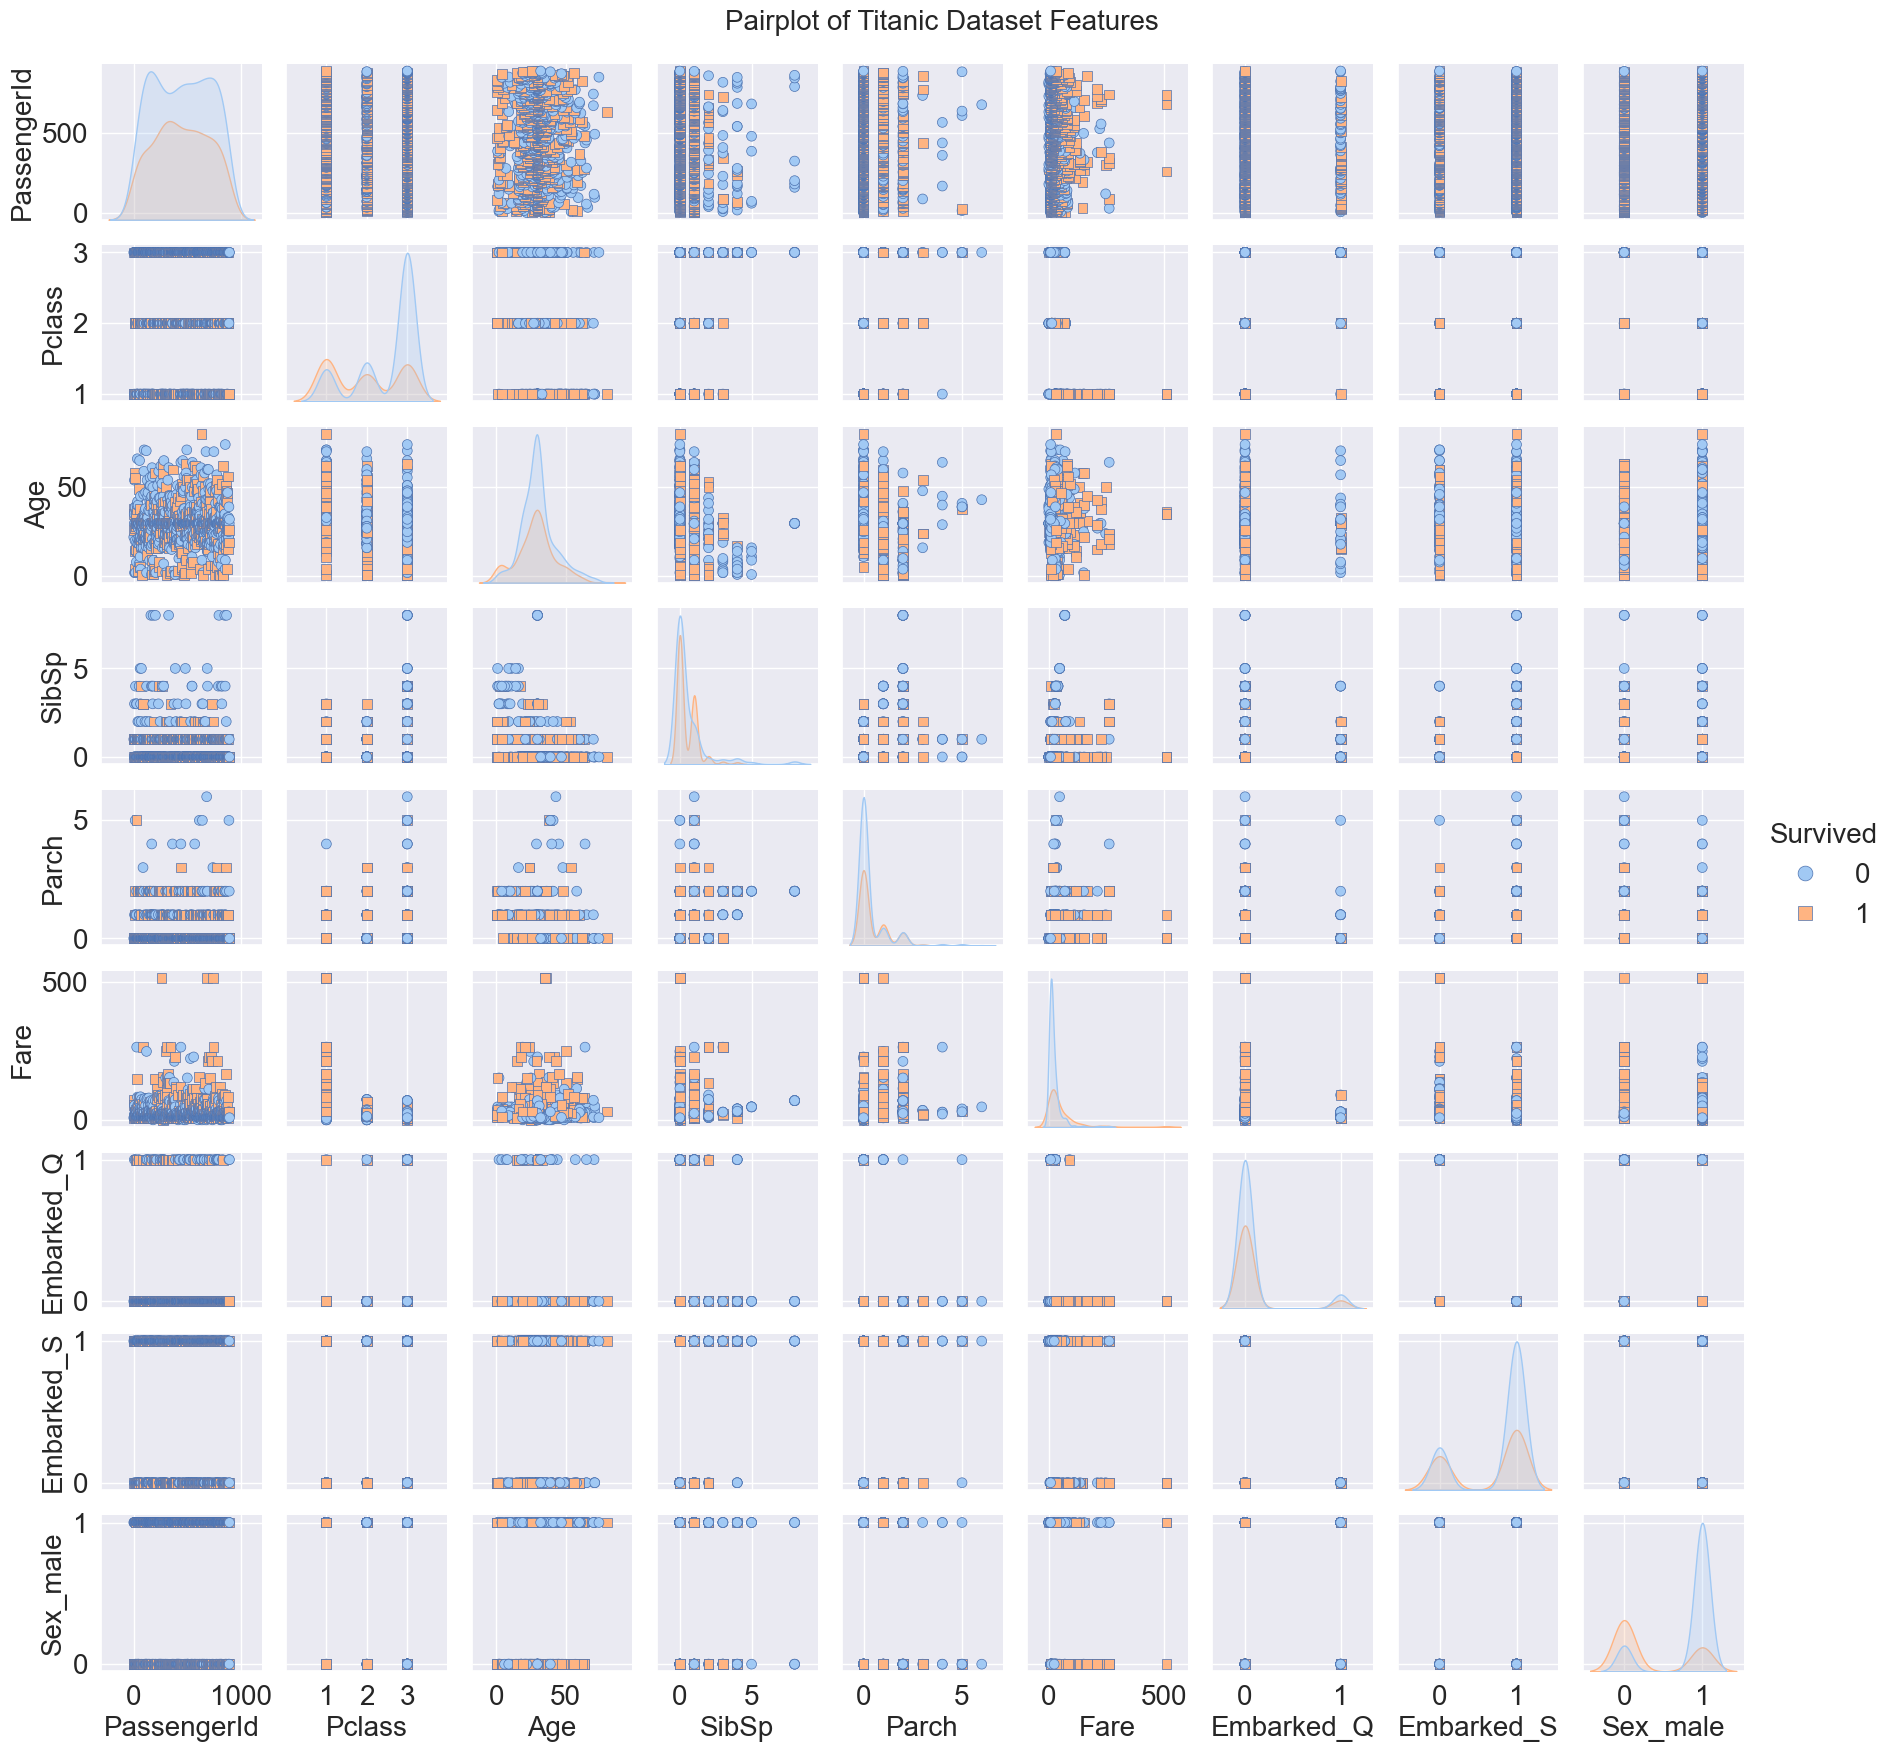

In [26]:
plt.figure(figsize=(12, 10))
sns.pairplot(data=titanic_train_cp_de_cp_df, hue="Survived", palette='pastel', height=2,
             markers=['o', 's'], plot_kws=dict(s=50, edgecolor="b", linewidth=0.5))
plt.subplots_adjust(top=0.95)
plt.suptitle('Pairplot of Titanic Dataset Features', fontsize=20)
plt.show()

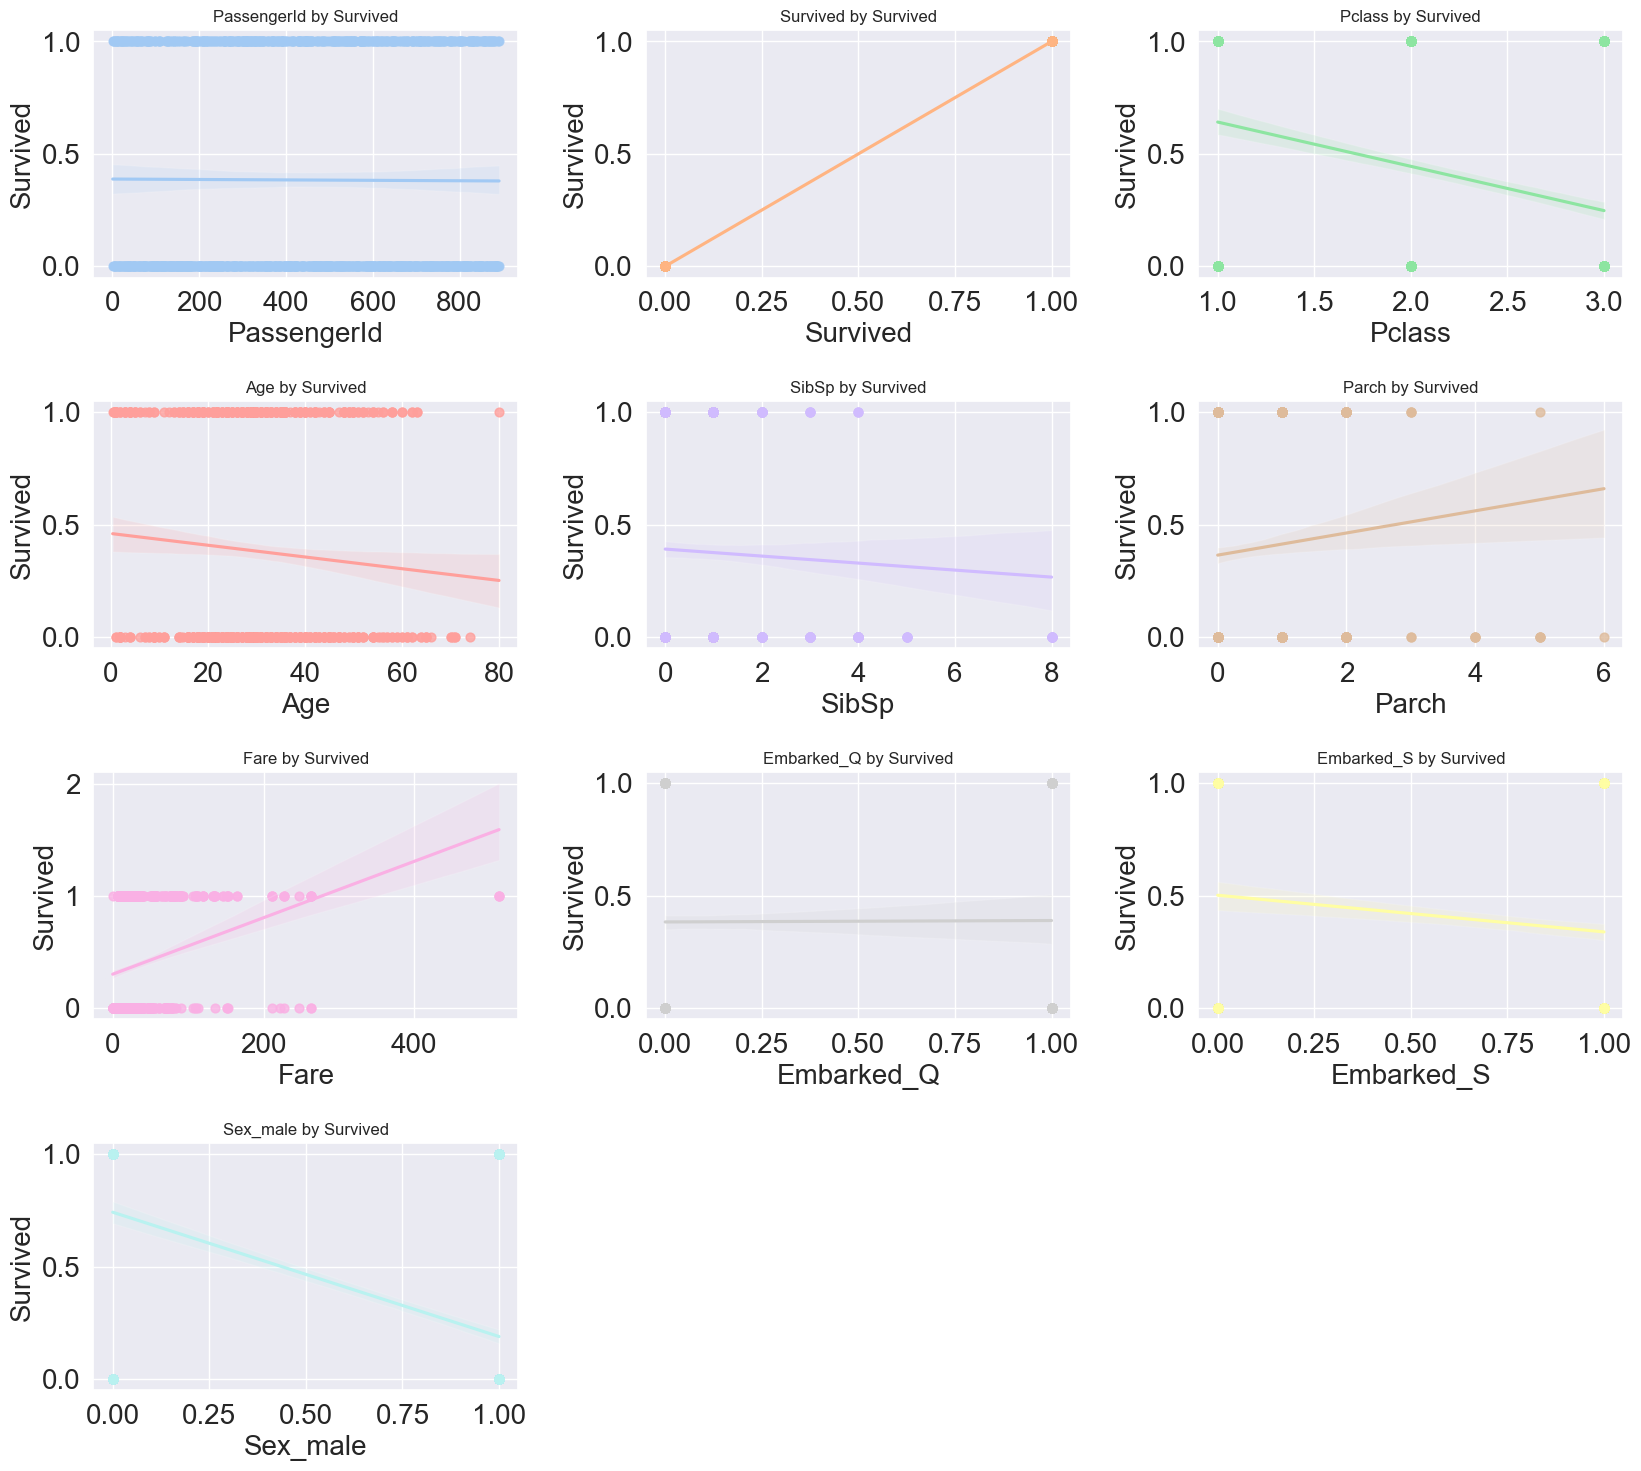

In [27]:
# get color map
def get_sns_cmap(n, name='muted'):
    return sns.color_palette(palette=name, n_colors=n)

# plot with regression line target values by each feature
def plot_reg_target_values_by_each_feature(df, target_column_name):
    ncols = 3  # Number of columns for subplots
    nrows = math.ceil(len(df.columns) / ncols)  # Calculate number of rows
    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 4 * nrows))
    plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.95, hspace=0.5, wspace=0.3)
    colors = sns.color_palette('pastel', n_colors=len(df.columns))

    for i, column in enumerate(df.columns):
        ax = axes[i // ncols, i % ncols]
        sns.regplot(x=column, y=target_column_name, data=df, color=colors[i], ax=ax, scatter_kws={"s": 40})
        ax.set_title(f'{column} by {target_column_name}', fontsize=12)

    # Remove any extra empty subplots
    for j in range(len(df.columns), nrows * ncols):
        fig.delaxes(axes.flatten()[j])

    plt.show()

plot_reg_target_values_by_each_feature(titanic_train_cp_de_cp_df, 'Survived')

**We can't see any distinctive feature correlation with survival, but the 'Sex_male' feature shows the strongest association.**

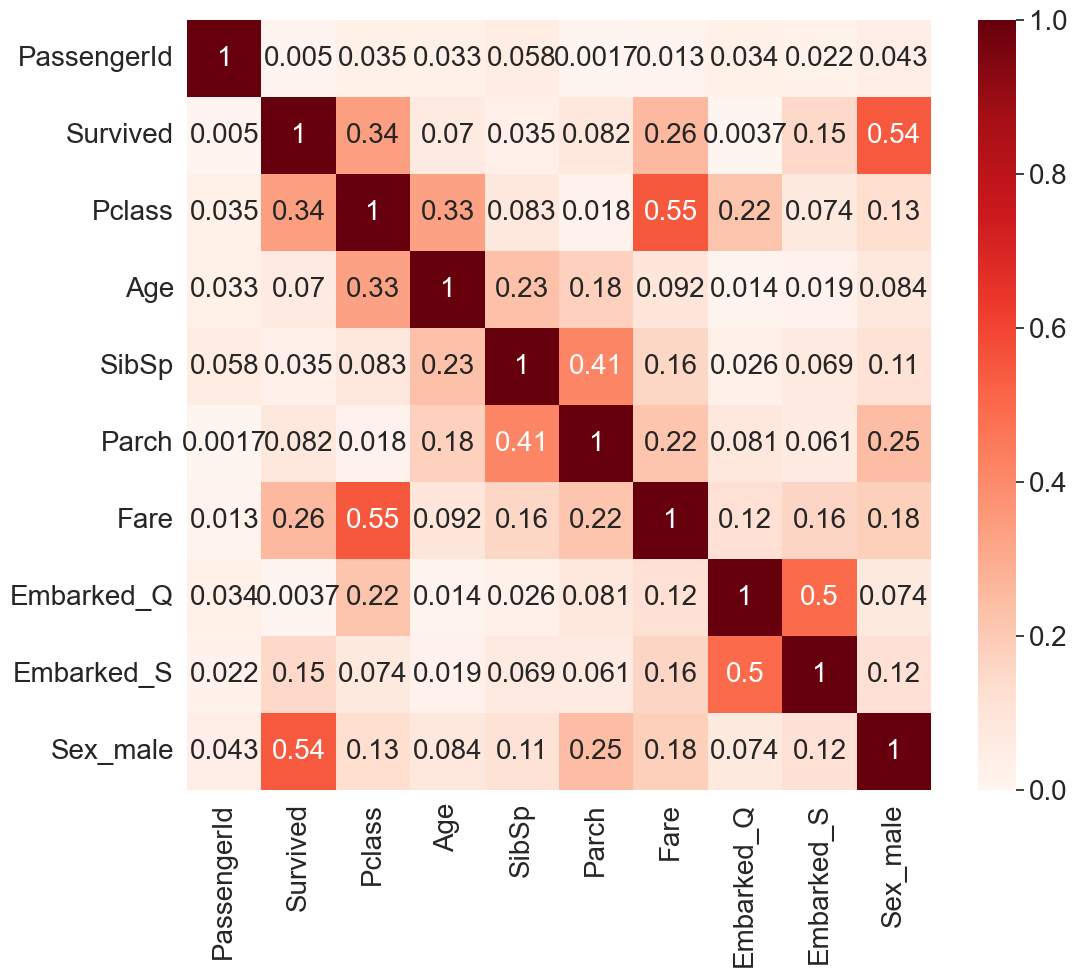

In [28]:
# show absolute correlation between features in a heatmap
plt.figure(figsize=(12,10))
cor = np.abs(titanic_train_cp_de_cp_df.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.show()

## **Droping features** 
we can see that the correlation with Embarked and PassengerId is all very low so we will drop those features

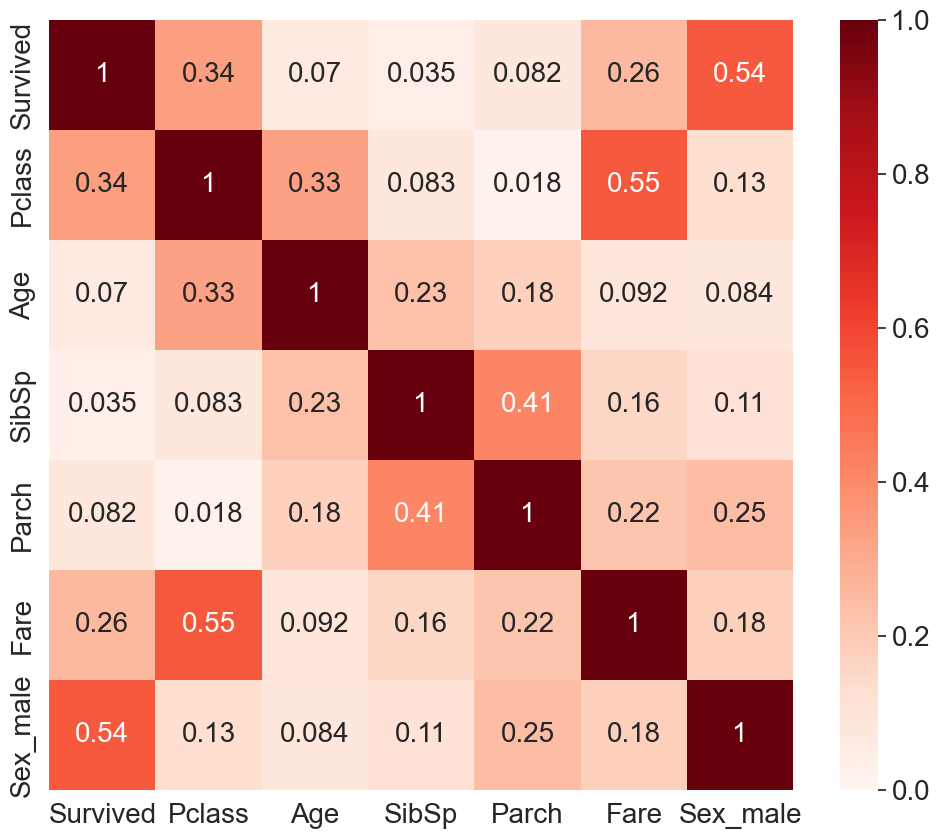

In [29]:
titanic_train_cp_de_cp_df = titanic_train_cp_de_cp_df.drop(['Embarked_Q','Embarked_S','PassengerId'], axis=1)
# show absolute correlation between features in a heatmap
plt.figure(figsize=(12,10))
cor = np.abs(titanic_train_cp_de_cp_df.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.show()

## **Train Val split** 
Let's split the data to train and validation.

In [30]:
# divide the data to features and target
t = titanic_train_cp_de_cp_df['Survived'].copy()
X = titanic_train_cp_de_cp_df.drop(['Survived'], axis=1)
print('t')
display(t)
print()
print('X')
display(X)

t


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


X


Pclass        Age  SibSp  Parch     Fare  Sex_male
0         3  22.000000      1      0   7.2500       1.0
1         1  38.000000      1      0  71.2833       0.0
2         3  26.000000      0      0   7.9250       0.0
3         1  35.000000      1      0  53.1000       0.0
4         3  35.000000      0      0   8.0500       1.0
..      ...        ...    ...    ...      ...       ...
886       2  27.000000      0      0  13.0000       1.0
887       1  19.000000      0      0  30.0000       0.0
888       3  29.699118      1      2  23.4500       0.0
889       1  26.000000      0      0  30.0000       1.0
890       3  32.000000      0      0   7.7500       1.0

[891 rows x 6 columns]

In [31]:
# split the data to train and validation
X_train, X_val, t_train, t_val =model_selection.train_test_split(X, t, test_size=0.2, random_state=42)
print('X_train')
display(X_train)
print()
print('t_train')
display(t_train)
print()
print('X_val')
display(X_val)
print()
print('t_val')
display(t_val)

X_train


Pclass        Age  SibSp  Parch      Fare  Sex_male
331       1  45.500000      0      0   28.5000       1.0
733       2  23.000000      0      0   13.0000       1.0
382       3  32.000000      0      0    7.9250       1.0
704       3  26.000000      1      0    7.8542       1.0
813       3   6.000000      4      2   31.2750       0.0
..      ...        ...    ...    ...       ...       ...
106       3  21.000000      0      0    7.6500       0.0
270       1  29.699118      0      0   31.0000       1.0
860       3  41.000000      2      0   14.1083       1.0
435       1  14.000000      1      2  120.0000       0.0
102       1  21.000000      0      1   77.2875       1.0

[712 rows x 6 columns]


t_train


331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64


X_val


Pclass        Age  SibSp  Parch     Fare  Sex_male
709       3  29.699118      1      1  15.2458       1.0
439       2  31.000000      0      0  10.5000       1.0
840       3  20.000000      0      0   7.9250       1.0
720       2   6.000000      0      1  33.0000       0.0
39        3  14.000000      1      0  11.2417       0.0
..      ...        ...    ...    ...      ...       ...
433       3  17.000000      0      0   7.1250       1.0
773       3  29.699118      0      0   7.2250       1.0
25        3  38.000000      1      5  31.3875       0.0
84        2  17.000000      0      0  10.5000       0.0
10        3   4.000000      1      1  16.7000       0.0

[179 rows x 6 columns]


t_val


709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

### **Compare  SGDClassifier, logisticRegression, and MLP Models**
Let's use `Dummy Encoder` and see which model is better for this dataset.

In [32]:
# show the accuracy by model
hp_models = {'SGDClassifier': SGDClassifier(), 'LogisticRegression': LogisticRegression(), 'MLPClassifier': MLPClassifier()}

def show_accuracy_by_model(X_train, t_train, X_val, t_val, models):
    accuracy_df = pd.DataFrame(columns=['model_name', 'split', 'accuracy'])

    for model_name, model in models.items():
        model_pipe = make_pipeline(StandardScaler(), model)
        model_pipe.fit(X_train, t_train)
        accuracy_df.loc[len(accuracy_df)] = [model_name, 'train', model_pipe.score(X_train, t_train)]
        accuracy_df.loc[len(accuracy_df)] = [model_name, 'val', model_pipe.score(X_val, t_val)]

    fig = px.bar(accuracy_df, x='model_name', y='accuracy', color='split', barmode='group')
    fig.show()

show_accuracy_by_model(X_train, t_train, X_val, t_val, hp_models)

C:\Users\97250.ADIRB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



**we can see the MLPClassifire has the best without the feature thats what we will use**

## **Additional Feature Creation** 

we can see there is a good correlation between pcClass and Fare so we will try and creat a new feature based on them called `Fare_Pclass` which will be defined as `Fare` / `Pclass`.

we will also add a feature called FamilySize - is `FamilySize` = `SibSp` + `Parch`

also new feature name - `IsAlone` it will recive value of 1 if Alone and 0 otherwise, it will be base on `FamilySize` if `FamilySize` = 0 `IsAlone` = 1


In [33]:
# show absolute correlation between features (with the new size feature) in a heatmap
titanic_train_df_cp_de_new_feature = titanic_train_cp_de_cp_df.copy()
titanic_train_df_cp_de_new_feature.insert(4, 'Fare_Pclass', 
                  titanic_train_df_cp_de_new_feature['Fare'] \
                  / titanic_train_df_cp_de_new_feature['Pclass'])

titanic_train_df_cp_de_new_feature.insert(4, 'FamilySize', 
                  titanic_train_df_cp_de_new_feature['SibSp'] \
                  + titanic_train_df_cp_de_new_feature['Parch'])

titanic_train_df_cp_de_new_feature.insert(4, 'IsAlone',
                  (titanic_train_df_cp_de_new_feature['FamilySize'] == 0).astype(int))

titanic_train_df_cp_de_new_feature.insert(4, 'FemaleAlone',
                  ((titanic_train_df_cp_de_new_feature['Sex_male'] == 0) & 
                   (titanic_train_df_cp_de_new_feature['IsAlone'] == 1)).astype(int))

titanic_train_df_cp_de_new_feature.insert(4, 'Male_Alone',
                  ((titanic_train_df_cp_de_new_feature['Sex_male'] == 1) & 
                   (titanic_train_df_cp_de_new_feature['IsAlone'] == 1)).astype(int))

In [34]:
titanic_train_df_cp_de_new_feature

Survived  Pclass        Age  SibSp  Male_Alone  FemaleAlone  IsAlone  \
0           0       3  22.000000      1           0            0        0   
1           1       1  38.000000      1           0            0        0   
2           1       3  26.000000      0           0            1        1   
3           1       1  35.000000      1           0            0        0   
4           0       3  35.000000      0           1            0        1   
..        ...     ...        ...    ...         ...          ...      ...   
886         0       2  27.000000      0           1            0        1   
887         1       1  19.000000      0           0            1        1   
888         0       3  29.699118      1           0            0        0   
889         1       1  26.000000      0           1            0        1   
890         0       3  32.000000      0           1            0        1   

     FamilySize  Fare_Pclass  Parch     Fare  Sex_male  
0             1     2.416667      0   7.2500       1.0  
1             1    71.283300      0  71.2833       0.0  
2             0     2.641667      0   7.9250       0.0  
3             1    53.100000      0  53.1000       0.0  
4             0     2.683333      0   8.0500       1.0  
..          ...          ...    ...      ...       ...  
886           0     6.500000      0  13.0000       1.0  
887           0    30.000000      0  30.0000       0.0  
888           3     7.816667      2  23.4500       0.0  
889           0    30.000000      0  30.0000       1.0  
890           0     2.583333      0   7.7500       1.0  

[891 rows x 12 columns]

### **Correlation after feature creation**

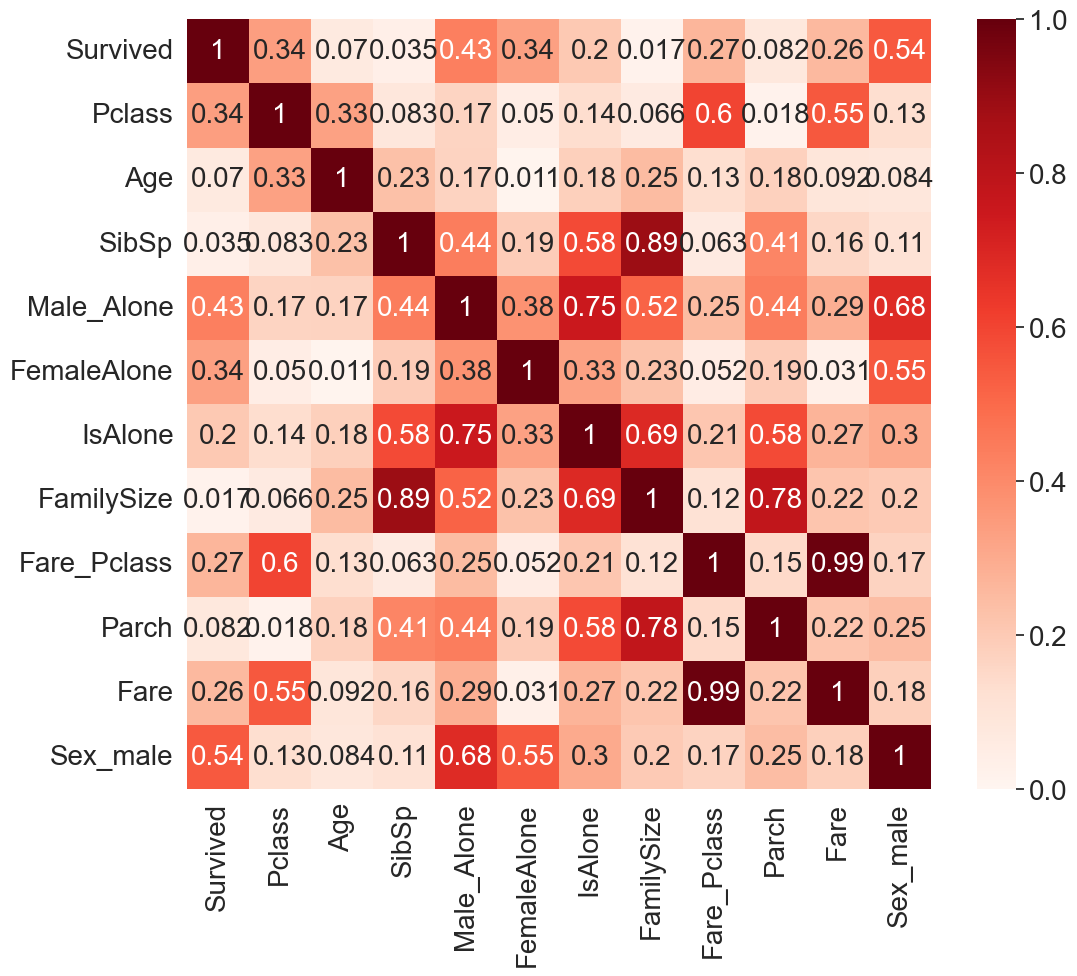

In [35]:
plt.figure(figsize=(12,10))
cor = np.abs(titanic_train_df_cp_de_new_feature.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.show()

**We will compare the two dataframes, with the new feature and without it, to see if it helped to get better predictions.
First, let's split the data.**

### **Training the MLP no feature addition** 

In [36]:
# Initialize and train the MLPClassifier pipeline
mlp_model = MLPClassifier( activation='logistic',
     solver='sgd', alpha=0, max_iter=10000)
mlp_pipe = make_pipeline(StandardScaler(), mlp_model)
mlp_pipe.fit(X_train, t_train)


y_train_prob = mlp_pipe.predict_proba(X_train)
y_val_prob = mlp_pipe.predict_proba(X_val)

print('Accuracy score on train',
      mlp_pipe.score(X_train, t_train))
print('Accuracy score on test',
      mlp_pipe.score(X_val, t_val))
print()
print('CE on train',
      metrics.log_loss(t_train, y_train_prob))
print('CE on test',
      metrics.log_loss(t_val, y_val_prob))

Accuracy score on train 0.7921348314606742
Accuracy score on test 0.7932960893854749

CE on train 0.46458105241766895
CE on test 0.44734035172978803


In [37]:
titanic_train_df_cp_de_new_feature

Survived  Pclass        Age  SibSp  Male_Alone  FemaleAlone  IsAlone  \
0           0       3  22.000000      1           0            0        0   
1           1       1  38.000000      1           0            0        0   
2           1       3  26.000000      0           0            1        1   
3           1       1  35.000000      1           0            0        0   
4           0       3  35.000000      0           1            0        1   
..        ...     ...        ...    ...         ...          ...      ...   
886         0       2  27.000000      0           1            0        1   
887         1       1  19.000000      0           0            1        1   
888         0       3  29.699118      1           0            0        0   
889         1       1  26.000000      0           1            0        1   
890         0       3  32.000000      0           1            0        1   

     FamilySize  Fare_Pclass  Parch     Fare  Sex_male  
0             1     2.416667      0   7.2500       1.0  
1             1    71.283300      0  71.2833       0.0  
2             0     2.641667      0   7.9250       0.0  
3             1    53.100000      0  53.1000       0.0  
4             0     2.683333      0   8.0500       1.0  
..          ...          ...    ...      ...       ...  
886           0     6.500000      0  13.0000       1.0  
887           0    30.000000      0  30.0000       0.0  
888           3     7.816667      2  23.4500       0.0  
889           0    30.000000      0  30.0000       1.0  
890           0     2.583333      0   7.7500       1.0  

[891 rows x 12 columns]

### **MLP on Dataset with self created additional features**
Let's check the results of the dataframe with the additional feature.

In [38]:
# calculate accuracy and CE loss of the new dataframe (with the additional feature) train and test (with MLP)


t_cp = titanic_train_df_cp_de_new_feature['Survived']
X_cp = titanic_train_df_cp_de_new_feature.drop('Survived', axis=1)

X_train_cp, X_val_cp,\
t_train_cp, t_val_cp =\
sklearn.model_selection.train_test_split(
    X_cp, t_cp, test_size=0.2, random_state=42)

# Initialize and train the MLPClassifier pipeline
mlp_model = MLPClassifier( activation='logistic',
     solver='sgd', alpha=0, max_iter=10000)
mlp_pipe = make_pipeline(StandardScaler(), mlp_model)
mlp_pipe.fit(X_train_cp, t_train_cp)

y_train_prob_cp = mlp_pipe.predict_proba(X_train_cp)
y_val_prob_cp = mlp_pipe.predict_proba(X_val_cp)

print('Accuracy score on train',
      mlp_pipe.score(X_train_cp, t_train_cp))
print('Accuracy score on test',
      mlp_pipe.score(X_val_cp, t_val_cp))
print()
print('CE on train',
      metrics.log_loss(t_train_cp, y_train_prob_cp))
print('CE on test',
      metrics.log_loss(t_val_cp, y_val_prob_cp))


Accuracy score on train 0.8089887640449438
Accuracy score on test 0.8156424581005587

CE on train 0.4684613846715906
CE on test 0.44593711918925166


**We can see the results are better with the additional feature, so we will continue with them**

### **Hyperprameters And Subsets Of Features: Accuracy** 

systematically search through different Subsets and hyperparameters to find the combination that gives the best performance for our MLP model


We can see that the bet combination of features and hyperprameters is:

`Pclass`, `Sex_male`, `Age`, `SibSp`, `Parch`, `Fare`, `FamilySize`, `IsAlone`, `Male_Alone`
'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 0.001, 'mlpclassifier__batch_size': 32, 'mlpclassifier__hidden_layer_sizes': (50, 50), 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__max_iter': 200, 'mlpclassifier__solver': 'sgd'

**so we will go on using that to train our model on**

## **Score And Loss Data With No Additional Features**

In [39]:
# print 4 graphs: ce of train/test and r2 of train/test
def print_graphs_r2_ce(graph_points):
  for k, v in graph_points.items():
    best_value = max(v.values()) if 'R2' in k else min(v.values())
    best_index = np.argmax(list(v.values())) if 'R2' in k else np.argmin(list(v.values()))
    color = 'r' if 'train' in k else 'b'
    plt.rcParams["figure.figsize"] = (16, 8)
    plt.plot(list(v.keys()), list(v.values()), color)
    plt.grid()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'{k}, best value: x={best_index + 1}, y={best_value}', fontsize=20)
    plt.show()

In [40]:
# plot the score by split and the loss by split for MLP

def plot_score_and_loss_by_split_MLP_No_Features(x, t):
  graph_points = { 'train_CE': {}, 'val_CE': {}, 'train_R2': {}, 'val_R2': {} }

  for size in range(10, 100, 10):
    x_train, x_val, t_train, t_val = model_selection.train_test_split(x, t, test_size=size/100, random_state=42)
    MLP_cls = neural_network.MLPClassifier(activation='relu', alpha=0.001, batch_size=32, hidden_layer_sizes=(50,), learning_rate='constant', max_iter=300, solver='sgd').fit(x_train, t_train)
    y_train_prob = MLP_cls.predict_proba(x_train)
    y_test_prob = MLP_cls.predict_proba(x_val)
    graph_points['train_CE'][size/100] = metrics.log_loss(t_train, y_train_prob)
    graph_points['val_CE'][size/100] = metrics.log_loss(t_val, y_test_prob)
    graph_points['train_R2'][size/100] = MLP_cls.score(x_train, t_train)
    graph_points['val_R2'][size/100] = MLP_cls.score(x_val, t_val)

  print_graphs_r2_ce(graph_points)



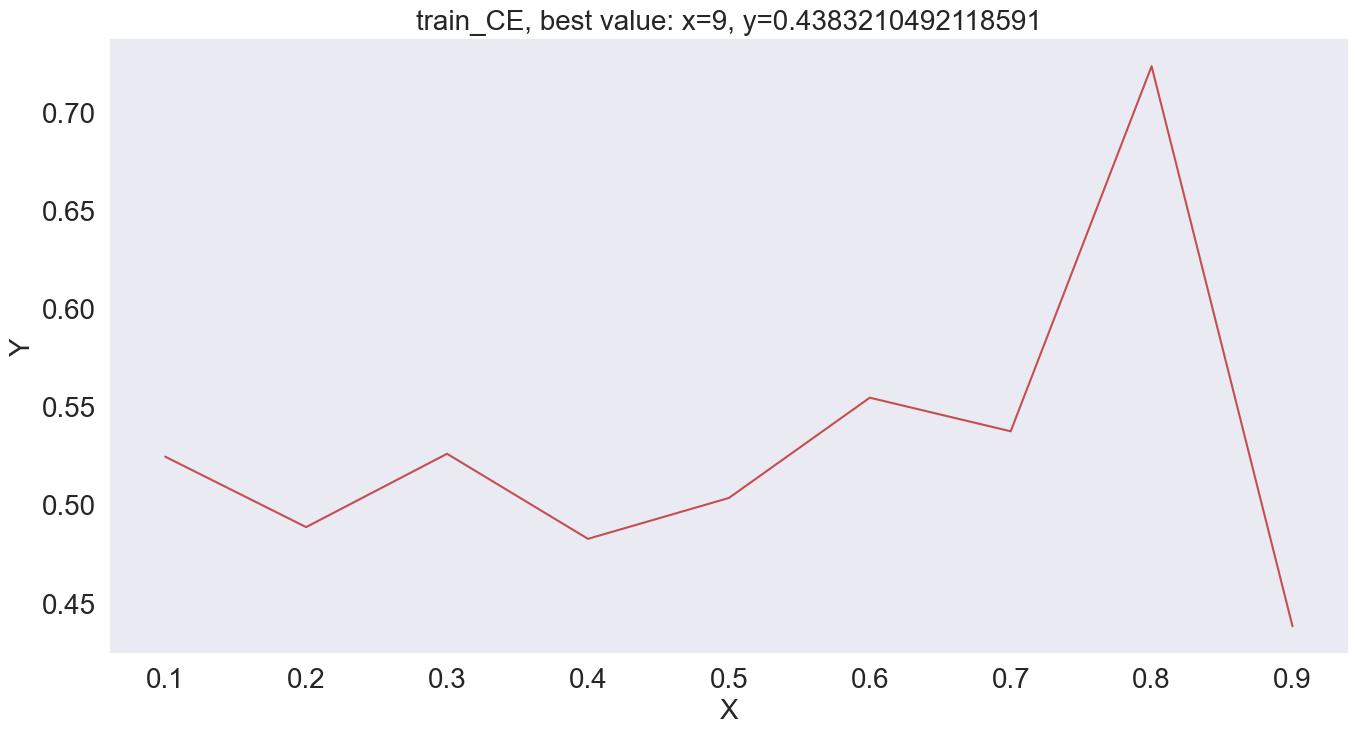

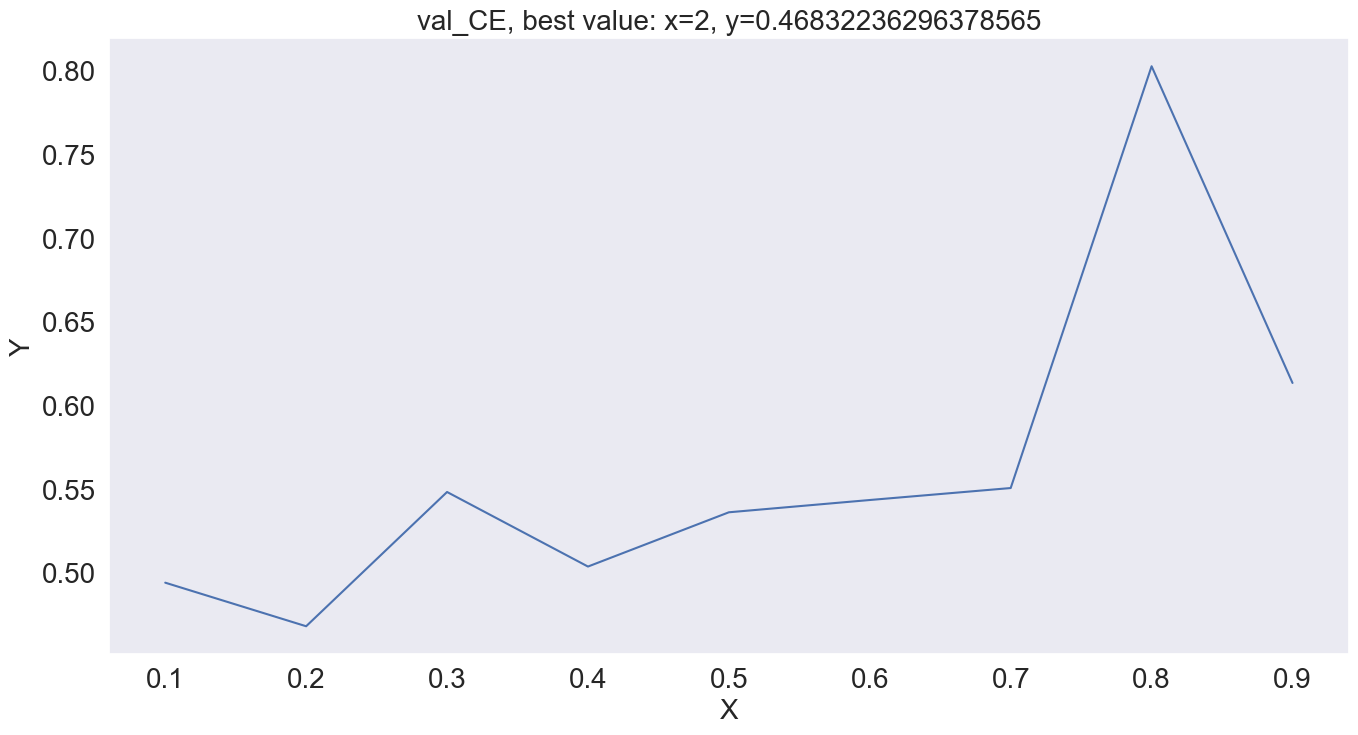

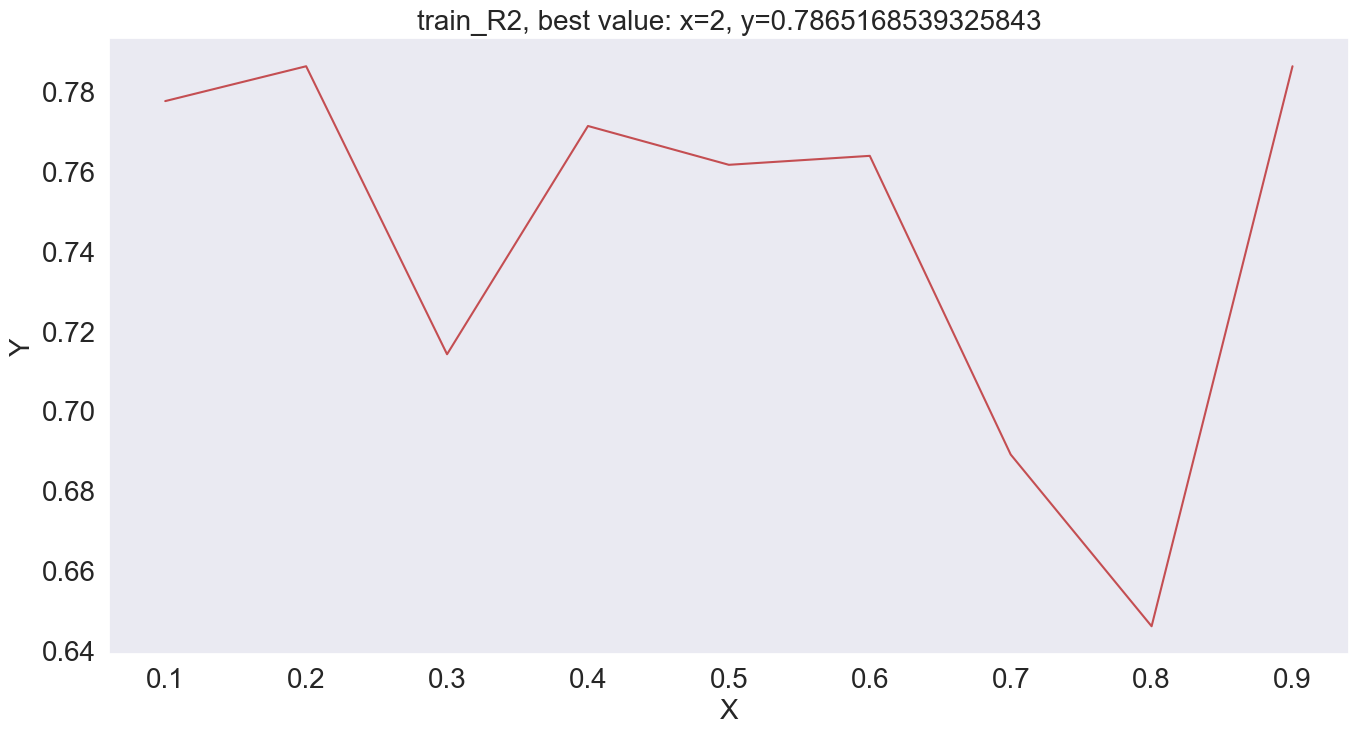

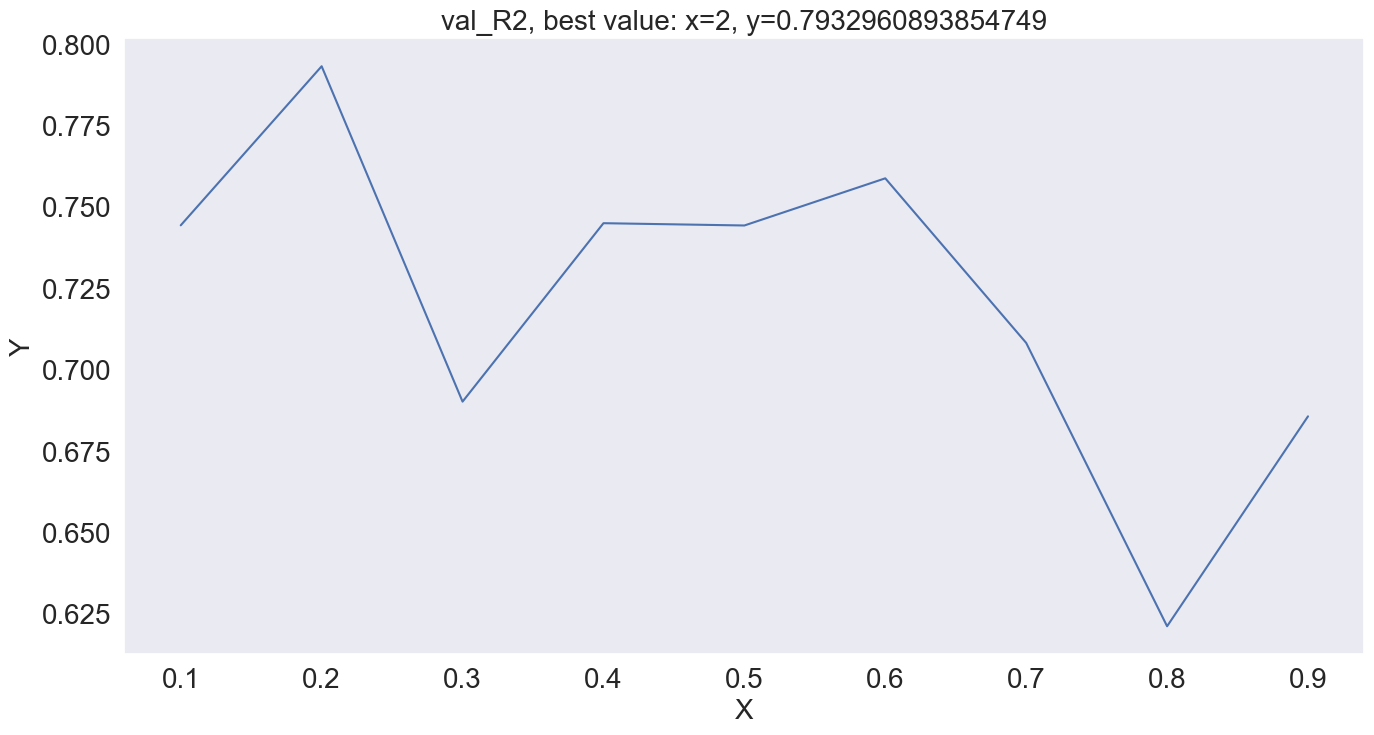

In [41]:
plot_score_and_loss_by_split_MLP_No_Features(X,t)

## **Score And Loss Data With Features**

In [42]:
def plot_score_and_loss_by_split_MLP_With_Features(x, t):
  graph_points = { 'train_CE': {}, 'val_CE': {}, 'train_R2': {}, 'val_R2': {} }

  for size in range(10, 100, 10):
    x_train, x_val, t_train, t_val = model_selection.train_test_split(x, t, test_size=size/100, random_state=42)
    MLP_cls = neural_network.MLPClassifier(activation='relu', alpha=0.001, batch_size=32, hidden_layer_sizes=(50, 50), learning_rate='adaptive', max_iter=200, solver='sgd').fit(x_train, t_train)
    y_train_prob = MLP_cls.predict_proba(x_train)
    y_test_prob = MLP_cls.predict_proba(x_val)
    graph_points['train_CE'][size/100] = metrics.log_loss(t_train, y_train_prob)
    graph_points['val_CE'][size/100] = metrics.log_loss(t_val, y_test_prob)
    graph_points['train_R2'][size/100] = MLP_cls.score(x_train, t_train)
    graph_points['val_R2'][size/100] = MLP_cls.score(x_val, t_val)

  print_graphs_r2_ce(graph_points)

In [43]:
t_cp = titanic_train_df_cp_de_new_feature['Survived']
X_cp = titanic_train_df_cp_de_new_feature.drop(['Survived','FemaleAlone','Fare_Pclass'], axis=1)

C:\Users\97250.ADIRB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\97250.ADIRB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\97250.ADIRB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\97250.ADIRB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

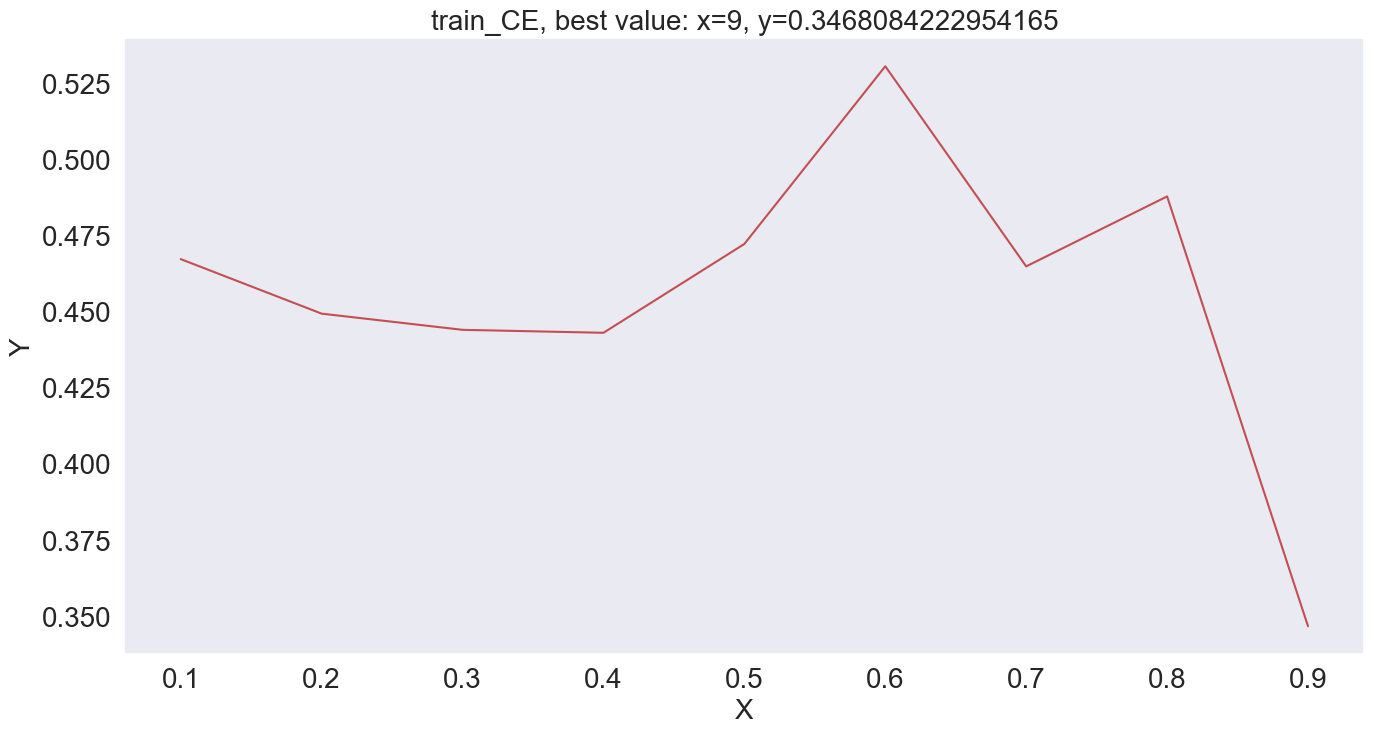

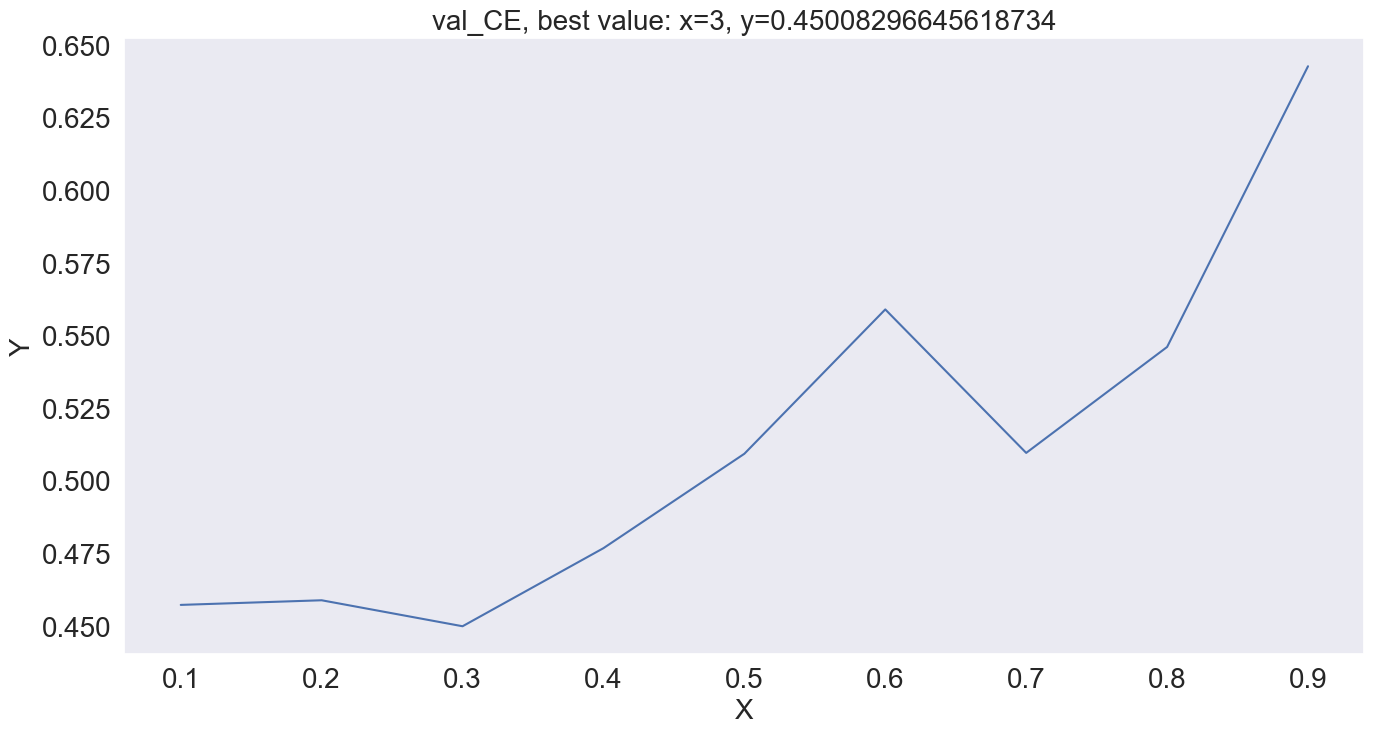

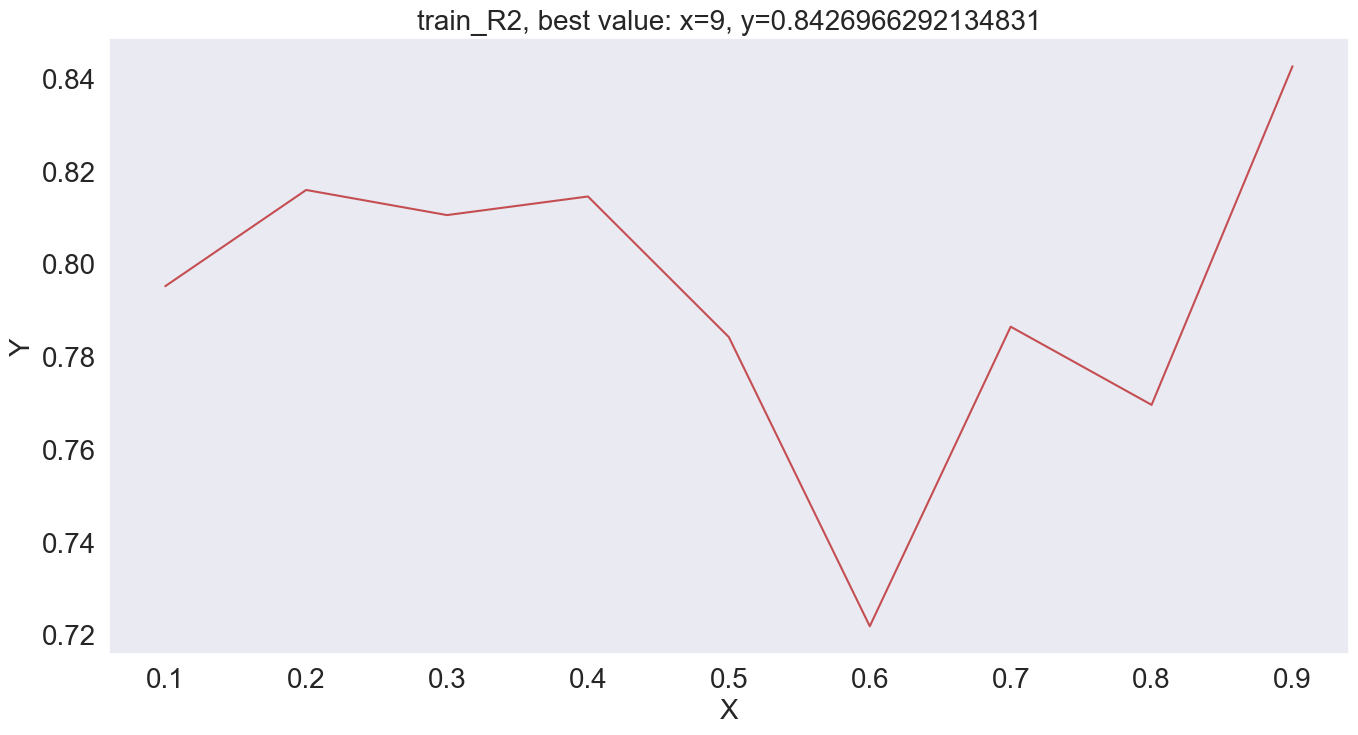

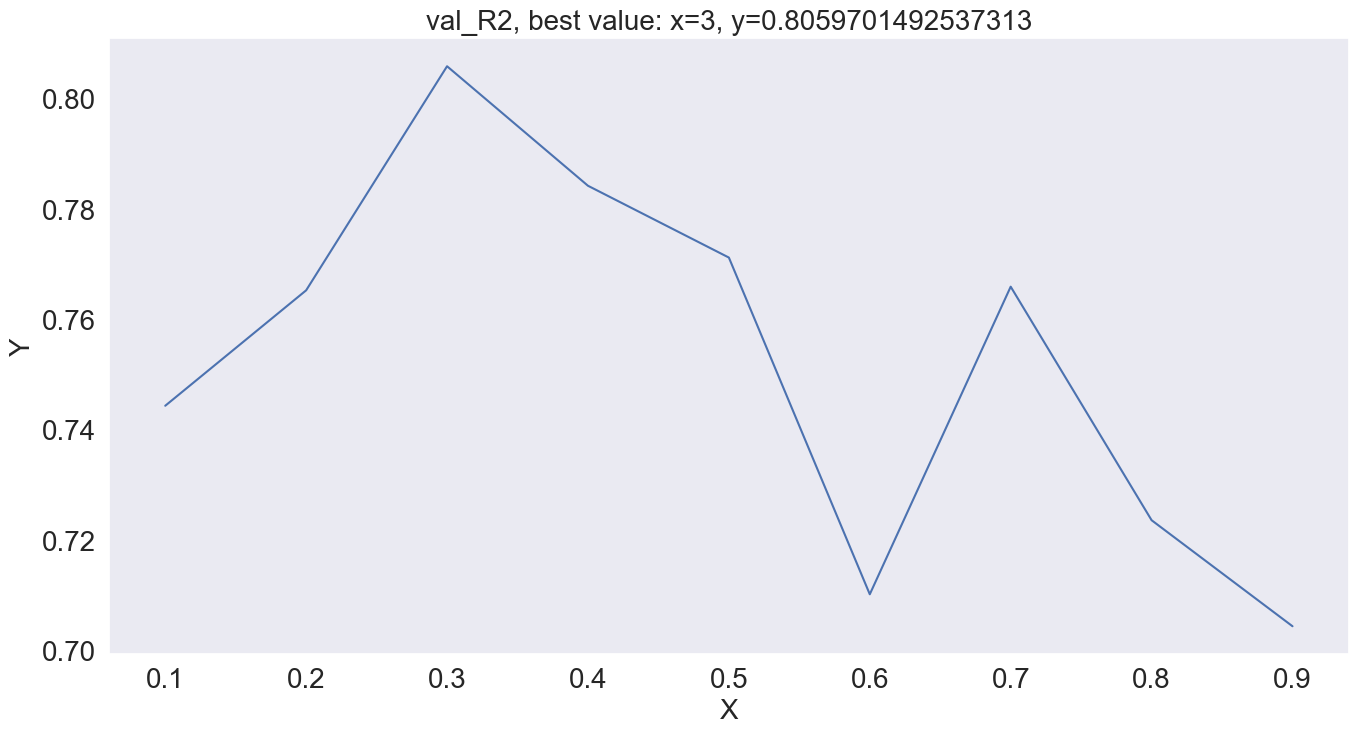

In [44]:
plot_score_and_loss_by_split_MLP_With_Features(X_cp,t_cp)

**Results**

We can see that from 0.1 to 0.75, the validtion loss is smaller than the train loss, and from 0.75 the train loss is smaller than the validtion loss.


in addition we can see that the cross entropy of regular train data is slightly lower than copy. thus we choose to divide the train data to 75% train and 25% validtion to get the best model.

### **Final Training** 

In [45]:

X_train_cp, X_val_cp,\
t_train_cp, t_val_cp =\
sklearn.model_selection.train_test_split(
    X_cp, t_cp, test_size=0.25, random_state=42)


In [46]:
# Initialize and train the MLPClassifier pipeline
mlp_model = MLPClassifier(activation='relu', alpha=0.001, batch_size=32, hidden_layer_sizes=(50, 50), learning_rate='adaptive', max_iter=200, solver='sgd')
mlp_pipe = make_pipeline(StandardScaler(), mlp_model)
mlp_pipe.fit(X_train_cp, t_train_cp)

y_train_prob = mlp_pipe.predict_proba(X_train_cp)
y_val_prob = mlp_pipe.predict_proba(X_val_cp)

print('Accuracy score on train',
      mlp_pipe.score(X_train_cp, t_train_cp))
print('Accuracy score on test',
      mlp_pipe.score(X_val_cp, t_val_cp))
print()
print('CE on train',
      metrics.log_loss(t_train_cp, y_train_prob))
print('CE on test',
      metrics.log_loss(t_val_cp, y_val_prob))

Accuracy score on train 0.8383233532934131
Accuracy score on test 0.8251121076233184

CE on train 0.3847404283174598
CE on test 0.441020241952452


C:\Users\97250.ADIRB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



## **Test droping features And Adding new features**

In [47]:
test_cp_df = test_cp_df.drop(['Embarked_Q','Embarked_S','PassengerId'], axis=1)


In [48]:
test_cp_new_feature = test_cp_df.copy()

test_cp_new_feature.insert(3, 'FamilySize', 
                  test_cp_new_feature['SibSp'] \
                  + test_cp_new_feature['Parch'])

test_cp_new_feature.insert(3, 'IsAlone',
                  (test_cp_new_feature['FamilySize'] == 0).astype(int))



test_cp_new_feature.insert(3, 'Male_Alone',
                  ((test_cp_new_feature['Sex_male'] == 1) & 
                   (test_cp_new_feature['IsAlone'] == 1)).astype(int))


### **Training with all the train dataset for submition and creating submission file**


In [49]:
test_cp_new_feature

Pclass       Age  SibSp  Male_Alone  IsAlone  FamilySize  Parch  \
0         3  34.50000      0           1        1           0      0   
1         3  47.00000      1           0        0           1      0   
2         2  62.00000      0           1        1           0      0   
3         3  27.00000      0           1        1           0      0   
4         3  22.00000      1           0        0           2      1   
..      ...       ...    ...         ...      ...         ...    ...   
413       3  30.27259      0           1        1           0      0   
414       1  39.00000      0           0        1           0      0   
415       3  38.50000      0           1        1           0      0   
416       3  30.27259      0           1        1           0      0   
417       3  30.27259      1           0        0           2      1   

         Fare  Sex_male  
0      7.8292       1.0  
1      7.0000       0.0  
2      9.6875       1.0  
3      8.6625       1.0  
4     12.2875       0.0  
..        ...       ...  
413    8.0500       1.0  
414  108.9000       0.0  
415    7.2500       1.0  
416    8.0500       1.0  
417   22.3583       1.0  

[418 rows x 9 columns]

In [50]:
# predict the test with MLP
mlp_model = MLPClassifier(activation='relu', alpha=0.001, batch_size=32, hidden_layer_sizes=(50, 50), learning_rate='adaptive', max_iter=200, solver='sgd')
mlp_pipe = make_pipeline(StandardScaler(), mlp_model)
mlp_pipe.fit(X_cp, t_cp)

submission_preds = mlp_pipe.predict(test_cp_new_feature)

C:\Users\97250.ADIRB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [51]:
# create the submission file
submission['Survived'] = submission_preds
submission.to_csv('submission.csv', index=False)
submission

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

## **Screenshot of up to 10 most recent submissions including your best submission and your place on the leaderboard.**

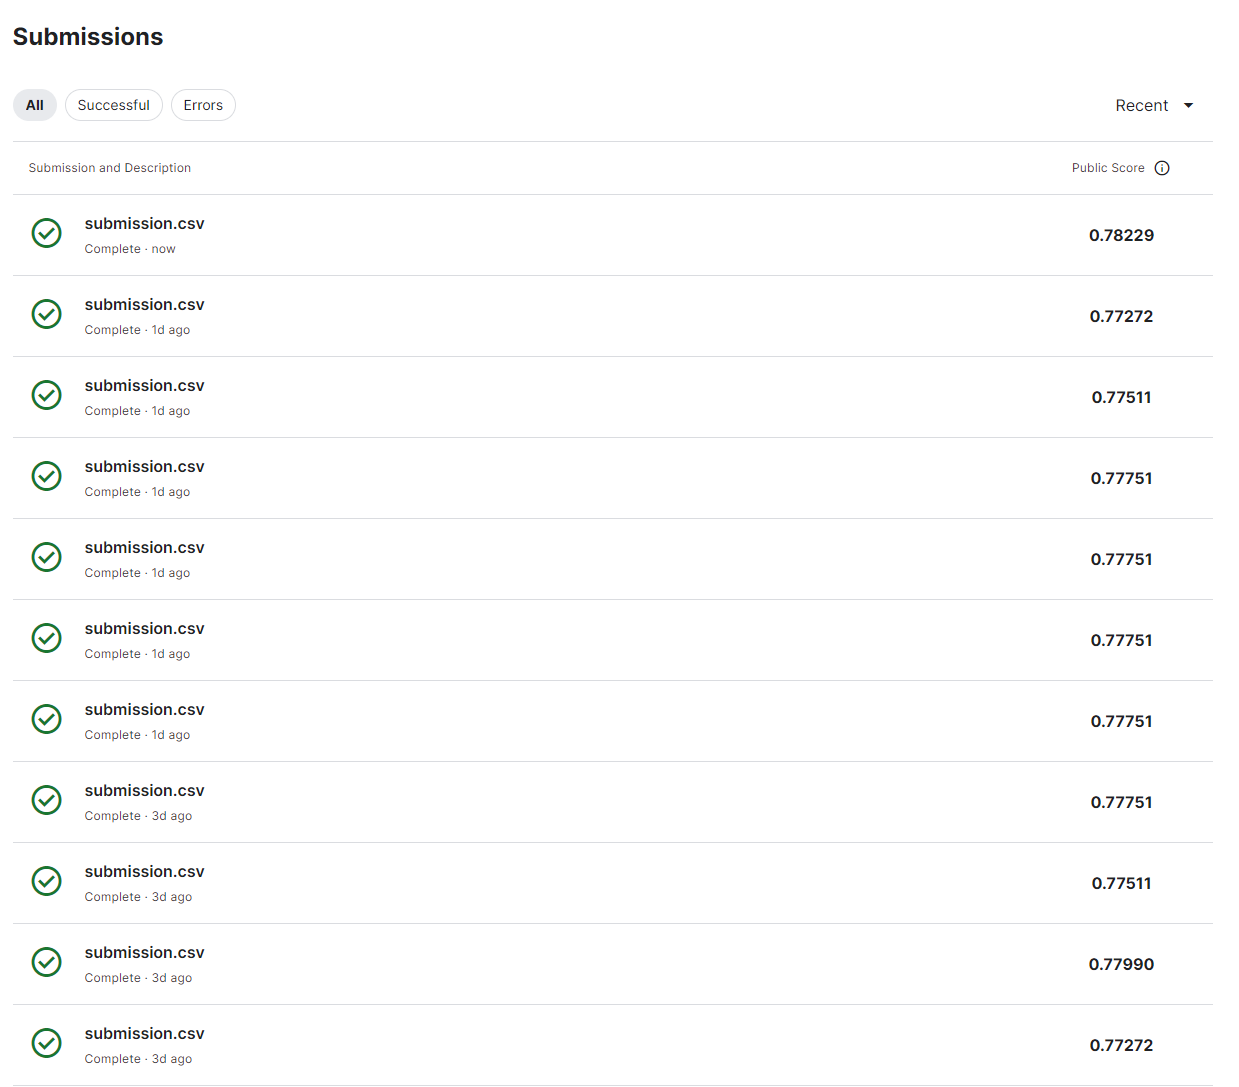

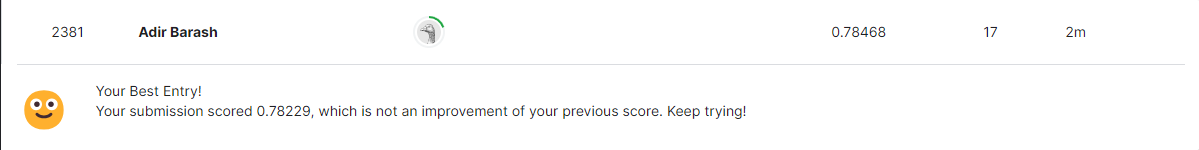

## **Summery**

**Data Preprocessing**

We cleaned the data by checking for missing values and handling them appropriately.

We converted categorical values to numerical values.

We performed exploratory data analysis to understand the relationships between the features and the target variable (Survived).


**Model Selection**

We compared the performance of three different models: SGDClassifier, logisticRegression, and MLP.

We selected the MLP model based on its superior performance.


**Feature Engineering**

We experimented with different feature sets to identify the most important features for predicting survival.

We used a function to evaluate the performance of different feature sets and hyperparameter combinations.


**Model Training and Evaluation**

We trained the MLP model on the entire dataset.

We evaluated the model's performance using various metrics.

We submitted our model to Kaggle for evaluation.

## **References**

https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

Course Notebooks - moodle

# Exercise 3

TL;DR EX3

In this Exercise, we will:

Experiments with feature selection, different models, ensembles and
hyper parameters search. 

we presented the Confusion matrix and KPIs , Graphs and results analysis.

Train a machine learning model to predict survival based on these features.

Let's Sink in!

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
import plotly.graph_objects as go
from sklearn.model_selection import KFold
from tqdm.auto import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB


In [53]:
# calculate precision, recall, specificity, fpr and accuracy
def precision(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fp)

def recall(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fn)

def specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    return tn/(tn+fp)

def fpr(cm):
    tn, fp, fn, tp = cm.ravel()
    return fp/(fp+tn)

def accuracy(cm):
    tn, fp, fn, tp = cm.ravel()
    return (tp+tn)/(tp+tn+fp+fn)

# calculate f1 and balanced accuracy
def f1(cm):
    precision_calc = precision(cm)
    recall_calc = recall(cm)
    return (2*precision_calc*recall_calc)/(precision_calc+recall_calc)

def balanced_accuracy(cm):
    recall_calc = recall(cm)
    specificity_calc = specificity(cm)
    return (recall_calc+specificity_calc)/2

def calc_metrics(cm):
  return {
      'precision': precision(cm),
      'recall': recall(cm),
      'specificity': specificity(cm),
      'fpr': fpr(cm),
      'accuracy': accuracy(cm),
      'f1': f1(cm),
      'balanced accuracy': balanced_accuracy(cm),
  }

In [54]:
# print all metrics from confusion_matrix for train and validation
def print_confusion_matrix(model, cm_train, cm_val):
  cm_train_df = pd.DataFrame(cm_train, index=['actual_0', 'actual_1'], columns=['predicted_0', 'predicted_1'])
  cm_val_df = pd.DataFrame(cm_val, index=['actual_0', 'actual_1'], columns=['predicted_0', 'predicted_1'])

  print('Confusion Matrix')
  fig, ax = plt.subplots(ncols=2, figsize=(10,3))
  for i, (df, title) in enumerate(zip([cm_train_df, cm_val_df], ['Train', 'Validation'])):
    fig = sns.heatmap(df, annot=True, ax=ax[i], cmap=plt.cm.Pastel1, fmt='g')
    fig.set_title(title)
  plt.subplots_adjust(top=1.5, bottom=0, left=0, right=1)
  plt.show()

  display(pd.DataFrame({ 'Tarin': calc_metrics(cm_train), 'Validation': calc_metrics(cm_val) }))

# Cross Validation

In [55]:
# find generator length
def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
  scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

  if k is not None:
    cv = KFold(n_splits=k, shuffle=True, random_state=2)
  elif p is not None:
    cv = LeavePOut(p)
  else:
    raise ValueError("Must specify either `K` or `P`.")

  if use_pbar:
    pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

  for i, (train_ids, val_ids) in enumerate(cv.split(X)):
    X_train = X.loc[train_ids]
    t_train = t.loc[train_ids]
    X_val = X.loc[val_ids]
    t_val = t.loc[val_ids]

    model.fit(X_train, t_train)

    y_train = model.predict_proba(X_train)
    y_val = model.predict_proba(X_val)

    scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), metrics.log_loss(t_train, y_train)]
    scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), metrics.log_loss(t_val, y_val)]

    if use_pbar:
      pbar.update()

  if use_pbar:
    pbar.close()

  val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
  train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

  mean_val_score = val_scores_losses_df['score'].mean()
  mean_val_loss = val_scores_losses_df['loss'].mean()
  mean_train_score = train_scores_losses_df['score'].mean()
  mean_train_loss = train_scores_losses_df['loss'].mean()
  cm_train = confusion_matrix(t_train, model.predict(X_train))
  cm_val = confusion_matrix(t_val, model.predict(X_val))

  if show_score_loss_graphs:
    fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Validation Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
    fig.show()
    fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Validation Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
    fig.show()
    print_confusion_matrix(model, cm_train, cm_val)

  return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

# Data Encoding

we will use the X_cp with the new features, because it showed better acuracy.

In [56]:
# determine categorical and numerical features
numerical_cols = X_cp.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_cp.select_dtypes(include=['object', 'bool']).columns
all_cols = list(categorical_cols) + list(numerical_cols)

print('Numerical Cols:', numerical_cols)
print('Categorical Cols:', categorical_cols)
print('All Cols:', all_cols)

Numerical Cols: Index(['Pclass', 'Age', 'SibSp', 'FamilySize', 'Parch', 'Fare', 'Sex_male'], dtype='object')
Categorical Cols: Index([], dtype='object')
All Cols: ['Pclass', 'Age', 'SibSp', 'FamilySize', 'Parch', 'Fare', 'Sex_male']


there are no categorial cols due to the use if dummy encoder in ex1, so we will now use StandardScaler.

In [57]:
# use column transformer to use StandardScaler for numerical columns
ct_std = ColumnTransformer([("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct_std.fit_transform(X_cp, t), columns=all_cols)

*althogh we used MLPClassifier in ex1, the results were not that diffrent from SGDClassifier so we will now use that in order to be more efficient*

# Feature Selection

In [58]:
def feature_selection_fig(selector):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.feature_names_in_) + 1)]
                             , y=selector.cv_results_['mean_test_score']))
    fig.update_xaxes(title_text="Number of features selected")
    fig.update_yaxes(title_text="Cross validation R2 score")
    fig.show()

*Backward Feature Selection*

In [59]:
# find best subset of features on this dataset
selector = RFECV(SGDClassifier(loss='log_loss', random_state=42), cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)).fit(X_encoded, t_cp)
X_selected_features_BW = X_encoded.loc[:, selector.support_]
display(X_selected_features_BW)

Pclass       Age     SibSp  FamilySize     Parch  Sex_male
0    0.827377 -0.592481  0.432793    0.059160 -0.473674  0.737695
1   -1.566107  0.638789  0.432793    0.059160 -0.473674 -1.355574
2    0.827377 -0.284663 -0.474545   -0.560975 -0.473674 -1.355574
3   -1.566107  0.407926  0.432793    0.059160 -0.473674 -1.355574
4    0.827377  0.407926 -0.474545   -0.560975 -0.473674  0.737695
..        ...       ...       ...         ...       ...       ...
886 -0.369365 -0.207709 -0.474545   -0.560975 -0.473674  0.737695
887 -1.566107 -0.823344 -0.474545   -0.560975 -0.473674 -1.355574
888  0.827377  0.000000  0.432793    1.299429  2.008933 -1.355574
889 -1.566107 -0.284663 -0.474545   -0.560975 -0.473674  0.737695
890  0.827377  0.177063 -0.474545   -0.560975 -0.473674  0.737695

[891 rows x 6 columns]

In [60]:
fig = go.Figure()
results = selector.cv_results_['mean_test_score'] # Getting the mean cv score for each set of features
fig.add_trace(go.Scatter(x=[i for i in range(1, len(results) + 1)], y=results))
fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
fig.show()

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

Confusion Matrix


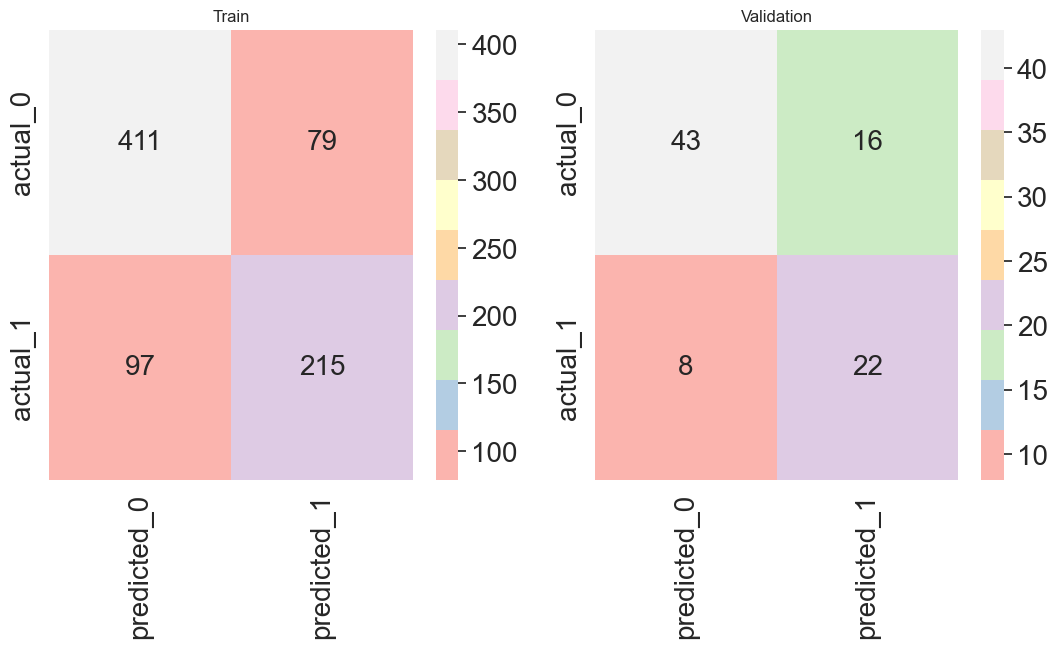

Tarin  Validation
precision          0.731293    0.578947
recall             0.689103    0.733333
specificity        0.838776    0.728814
fpr                0.161224    0.271186
accuracy           0.780549    0.730337
f1                 0.709571    0.647059
balanced accuracy  0.763939    0.731073

mean cv val score: 0.76
mean cv val loss 0.57
mean cv train score: 0.76
mean cv train loss 0.56


In [61]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features_BW, t_cp, SGDClassifier(loss='log_loss', random_state=42), k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

**Forword Selection**

FamilySize      Fare  Sex_male
0      0.059160 -0.502445  0.737695
1      0.059160  0.786845 -1.355574
2     -0.560975 -0.488854 -1.355574
3      0.059160  0.420730 -1.355574
4     -0.560975 -0.486337  0.737695
..          ...       ...       ...
886   -0.560975 -0.386671  0.737695
887   -0.560975 -0.044381 -1.355574
888    1.299429 -0.176263 -1.355574
889   -0.560975 -0.044381  0.737695
890   -0.560975 -0.492378  0.737695

[891 rows x 3 columns]

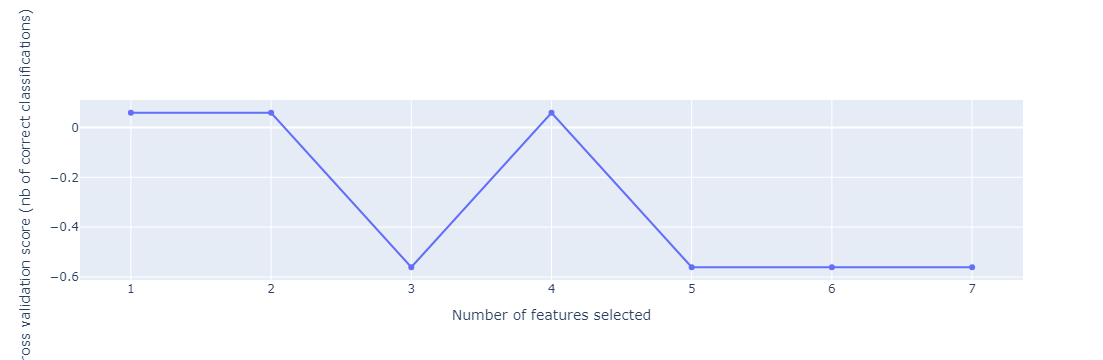

In [62]:
# Define the SGDClassifier for feature selection
sgd_classifier = SGDClassifier(loss='log_loss', random_state=42)

# Initialize the SequentialFeatureSelector with the SGDClassifier
sfs = SequentialFeatureSelector(
    estimator=sgd_classifier,
    n_features_to_select="auto",  # You can also specify an integer for a fixed number of features
    direction='forward',  # Forward selection
    scoring='accuracy',  # You can change this to any other appropriate scoring metric
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=42),
    n_jobs=-1  # Use all available cores for parallel processing
)

# Fit the SequentialFeatureSelector
sfs.fit(X_encoded, t_cp)
X_selected_features_FW = X_encoded.loc[:, sfs.get_support()]
display(X_selected_features_FW)

# Plot the results
fig = go.Figure()
results = sfs.get_support()  # Get the selected features mask
fig.add_trace(go.Scatter(x=[i for i in range(1, len(results) + 1)], y=sfs.transform(X_encoded)[:, 0]))
fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
fig.show()

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

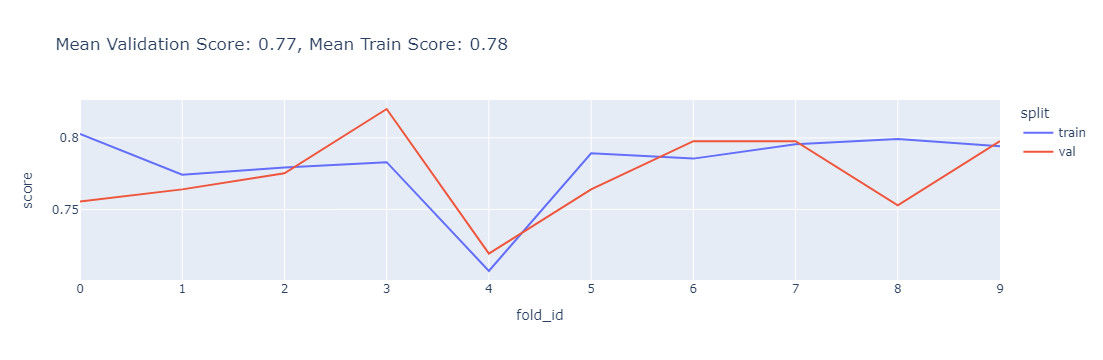

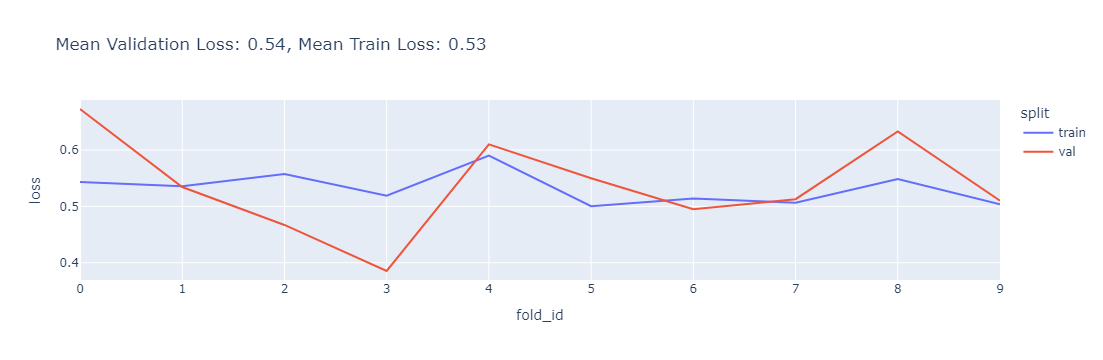

Confusion Matrix


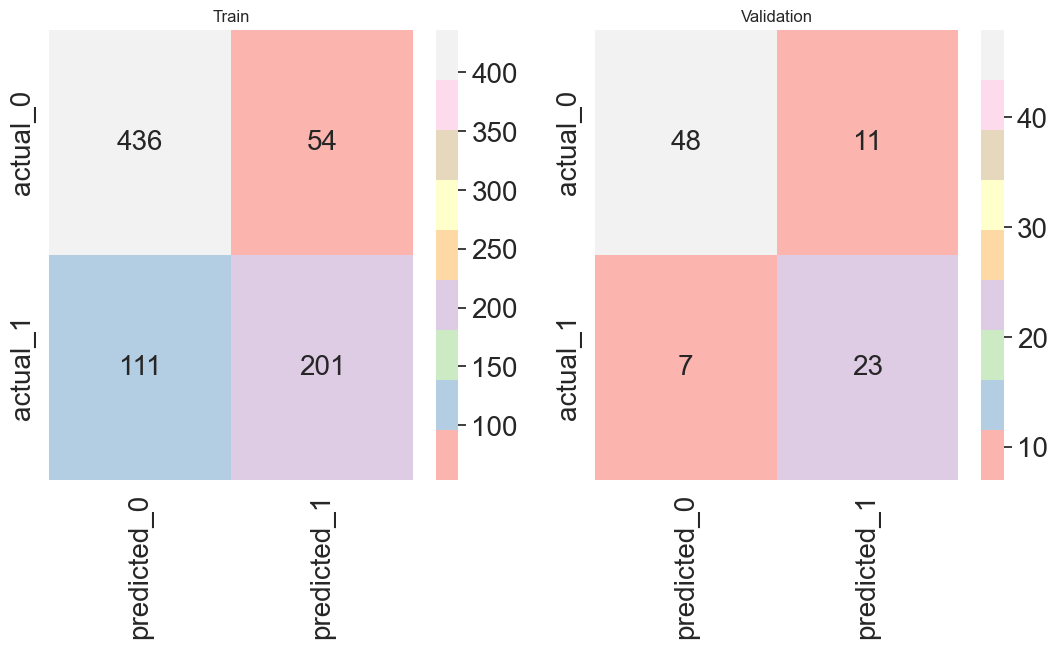

Tarin  Validation
precision          0.788235    0.676471
recall             0.644231    0.766667
specificity        0.889796    0.813559
fpr                0.110204    0.186441
accuracy           0.794264    0.797753
f1                 0.708995    0.718750
balanced accuracy  0.767013    0.790113

mean cv val score: 0.77
mean cv val loss 0.54
mean cv train score: 0.78
mean cv train loss 0.53


In [63]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features_FW, t_cp, SGDClassifier(loss='log_loss', random_state=42), k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

*We can see that the diffrence is minimal and Forward Feature Selection choose only 3 features so we will go with Backward Feature Selection and use:`X_selected_features_BW`*

# Hyper-Parameters Search

In [64]:
# train with grid search and get best parameters
hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'), 'alpha':[0.0001, 0.001, 0.01, 0.1]}

gs_model = GridSearchCV(SGDClassifier(random_state=42), hyper_parameters).fit(X_selected_features_BW, t_cp)
print('Accuracy score for classification:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

Accuracy score for classification:
gs_model 0.7957190383528967
best params {'alpha': 0.001, 'penalty': 'l1'}


# Ensembles

**Bagging**

nfold bagging

In [65]:
# get score with nfold bagging
from sklearn.ensemble import BaggingClassifier

bag_fold_model = BaggingClassifier(estimator=SGDClassifier(alpha= 0.001, penalty = 'l1',random_state=42),
                                   n_estimators=20, random_state=42,
                                   bootstrap=False).fit(X_selected_features_BW, t_cp)

print('Accuracy score for classification:')
print('bag_fold_model', bag_fold_model.score(X_selected_features_BW, t_cp))

Accuracy score for classification:
bag_fold_model 0.7912457912457912


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

Confusion Matrix


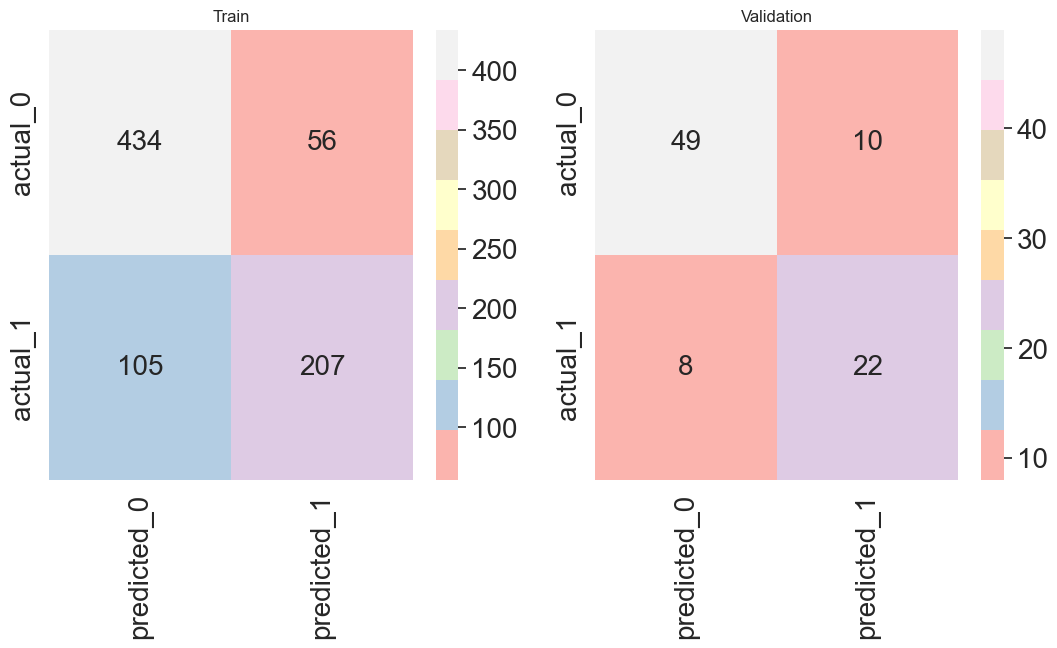

Tarin  Validation
precision          0.787072    0.687500
recall             0.663462    0.733333
specificity        0.885714    0.830508
fpr                0.114286    0.169492
accuracy           0.799252    0.797753
f1                 0.720000    0.709677
balanced accuracy  0.774588    0.781921

mean cv val score: 0.79
mean cv val loss 5.57
mean cv train score: 0.79
mean cv train loss 5.28


In [66]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features_BW, t_cp, bag_fold_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

bootstrap bagging

In [67]:
# get score with bootstrap bagging
bag_boot_model = BaggingClassifier(estimator=SGDClassifier(alpha= 0.001, penalty = 'l1',random_state=42),
                                   n_estimators=20, random_state=42,
                                   bootstrap=True).fit(X_selected_features_BW, t_cp)

print('Accuracy score for classification:')
print('bag_boot_model', bag_boot_model.score(X_selected_features_BW, t_cp))

Accuracy score for classification:
bag_boot_model 0.8002244668911336


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

Confusion Matrix


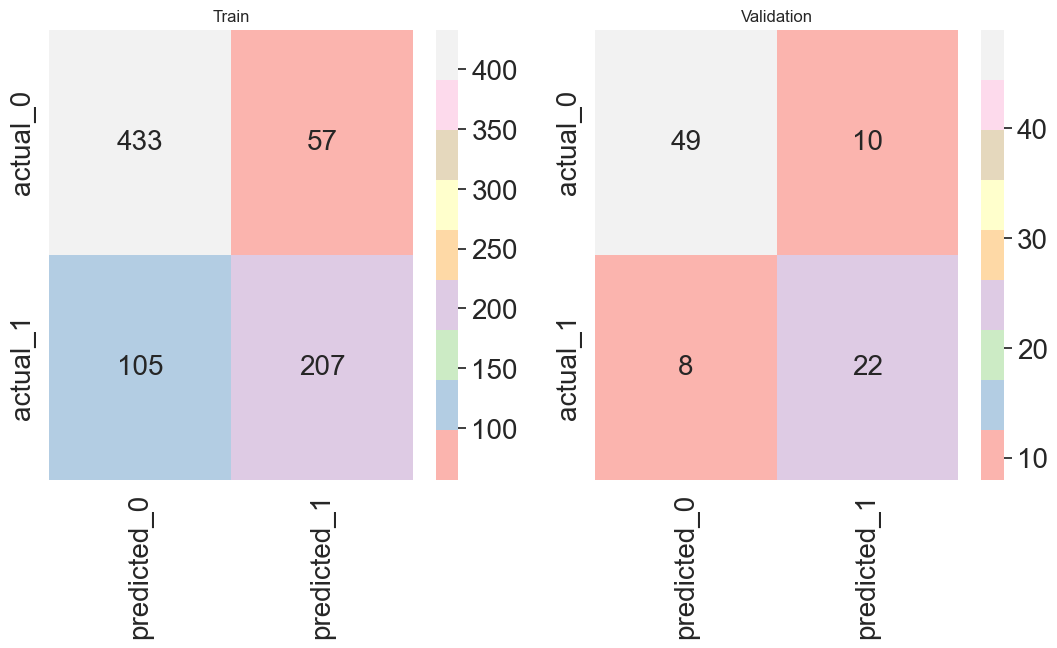

Tarin  Validation
precision          0.784091    0.687500
recall             0.663462    0.733333
specificity        0.883673    0.830508
fpr                0.116327    0.169492
accuracy           0.798005    0.797753
f1                 0.718750    0.709677
balanced accuracy  0.773568    0.781921

mean cv val score: 0.79
mean cv val loss 3.35
mean cv train score: 0.80
mean cv train loss 3.27


In [68]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features_BW, t_cp, bag_boot_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

**Boosting**

In [69]:
# get score with ada boosting
from sklearn.ensemble import AdaBoostClassifier

ada_boost_model = AdaBoostClassifier(n_estimators=100, random_state=42).fit(X_selected_features_BW, t_cp)

print('Accuracy score for classification:')
print('ada_boost_model', ada_boost_model.score(X_selected_features_BW, t_cp))

Accuracy score for classification:
ada_boost_model 0.8316498316498316


C:\Users\97250.ADIRB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\97250.ADIRB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

C:\Users\97250.ADIRB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

C:\Users\97250.ADIRB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

C:\Users\97250.ADIRB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will 

Confusion Matrix


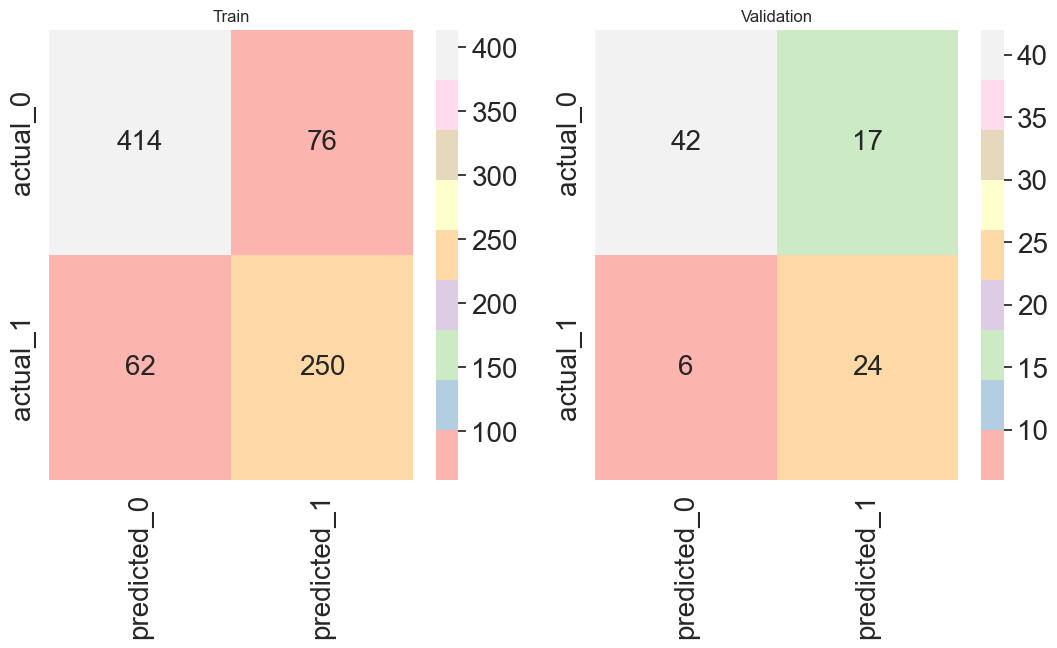

Tarin  Validation
precision          0.766871    0.585366
recall             0.801282    0.800000
specificity        0.844898    0.711864
fpr                0.155102    0.288136
accuracy           0.827930    0.741573
f1                 0.783699    0.676056
balanced accuracy  0.823090    0.755932

mean cv val score: 0.80
mean cv val loss 0.68
mean cv train score: 0.83
mean cv train loss 0.68


In [70]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features_BW, t_cp, ada_boost_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

# KNN

In [71]:
# run KNN on the dataset and find best K by accuracy
from sklearn.neighbors import KNeighborsClassifier
hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsClassifier(), hyper_parameters).fit(X_selected_features_BW, t_cp)
print('Accuracy score for classification:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

Accuracy score for classification:
gs_neigh_model 0.8237712635741635
best params {'n_neighbors': 19}


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

Confusion Matrix


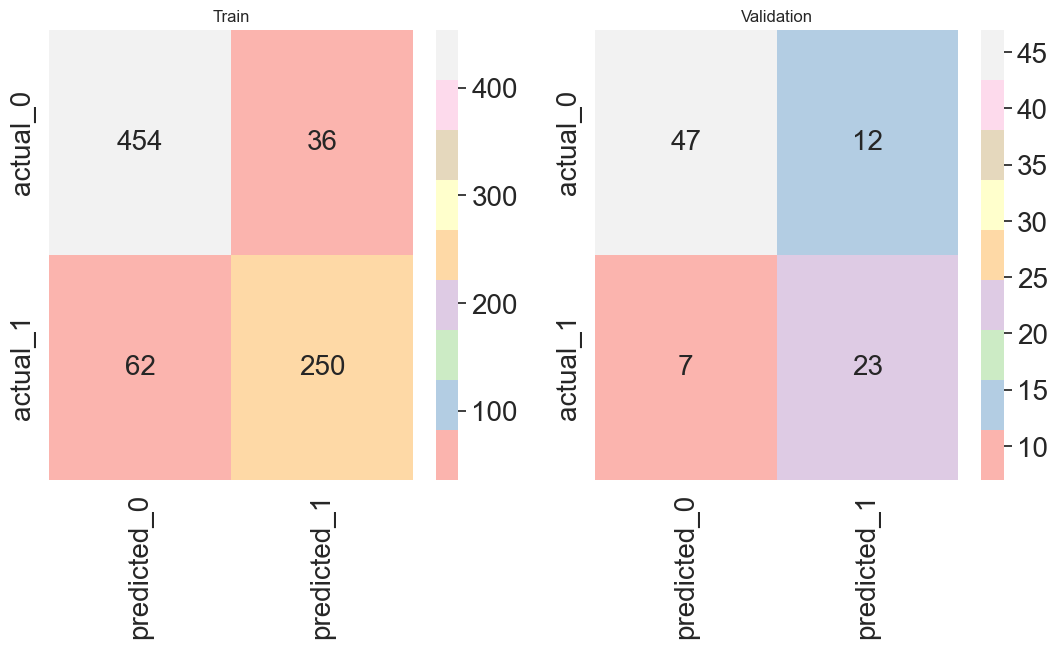

Tarin  Validation
precision          0.874126    0.657143
recall             0.801282    0.766667
specificity        0.926531    0.796610
fpr                0.073469    0.203390
accuracy           0.877805    0.786517
f1                 0.836120    0.707692
balanced accuracy  0.863906    0.781638

mean cv val score: 0.81
mean cv val loss 1.73
mean cv train score: 0.84
mean cv train loss 0.51


In [72]:
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_selected_features_BW, t_cp, gs_neigh_model, k=10, p=None, show_score_loss_graphs=True, use_pbar=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

# NBC (Naive Bayes)

MultinomialNB

In [73]:
# show score of nbc on the data
ct_nbc = ColumnTransformer([("scaling", MinMaxScaler(), numerical_cols)])
X_encoded_nbc = pd.DataFrame(ct_nbc.fit_transform(X_cp, t), columns=all_cols)

print('MultinomialNB score:', cross_val_score(MultinomialNB(), X_encoded_nbc, t_cp, cv=15).mean())


MultinomialNB score: 0.6442937853107346


GaussianNB

In [74]:
print('GaussianNB score:', cross_val_score(GaussianNB(), X_encoded_nbc, t_cp, cv=15).mean())


GaussianNB score: 0.7857438794726932


**Conclusion**

The training process involved feature selection using Backward Feature Selection, which resulted in a set of 6 relevant features. Subsequently, Grid Search was employed to identify the optimal hyperparameters for each model. Our evaluation, based on cross-validation and accuracy, revealed that the ada_boost_model emerged as the best performing model. Consequently, this model will be utilized for predicting the test data.

# Test 

In [75]:
model = AdaBoostClassifier(n_estimators=100, random_state=42).fit(X_selected_features_BW, t_cp)

C:\Users\97250.ADIRB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



In [76]:
test_selected = test_cp_new_feature[X_selected_features_BW.columns]

test_numerical_cols = test_selected.select_dtypes(include=['int64', 'float64']).columns
test_categorical_cols = test_selected.select_dtypes(include=['object', 'bool']).columns
test_all_cols = list(test_categorical_cols) + list(test_numerical_cols)

ct_test_std = ColumnTransformer([("standard", StandardScaler(), test_numerical_cols)])

test_encoded = pd.DataFrame(ct_test_std.fit_transform(test_selected), columns=test_all_cols)

In [77]:
submission_preds = model.predict(test_encoded)

In [78]:
# create the submission file
submission['Survived'] = submission_preds
submission.to_csv('submission.csv', index=False)
submission

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

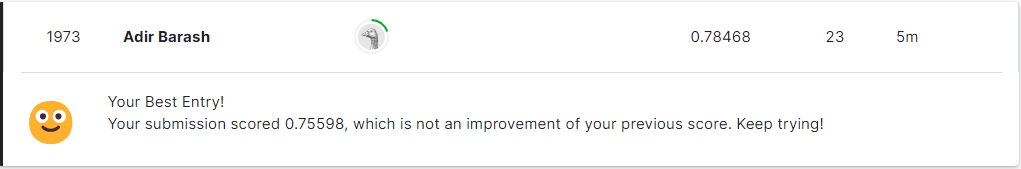

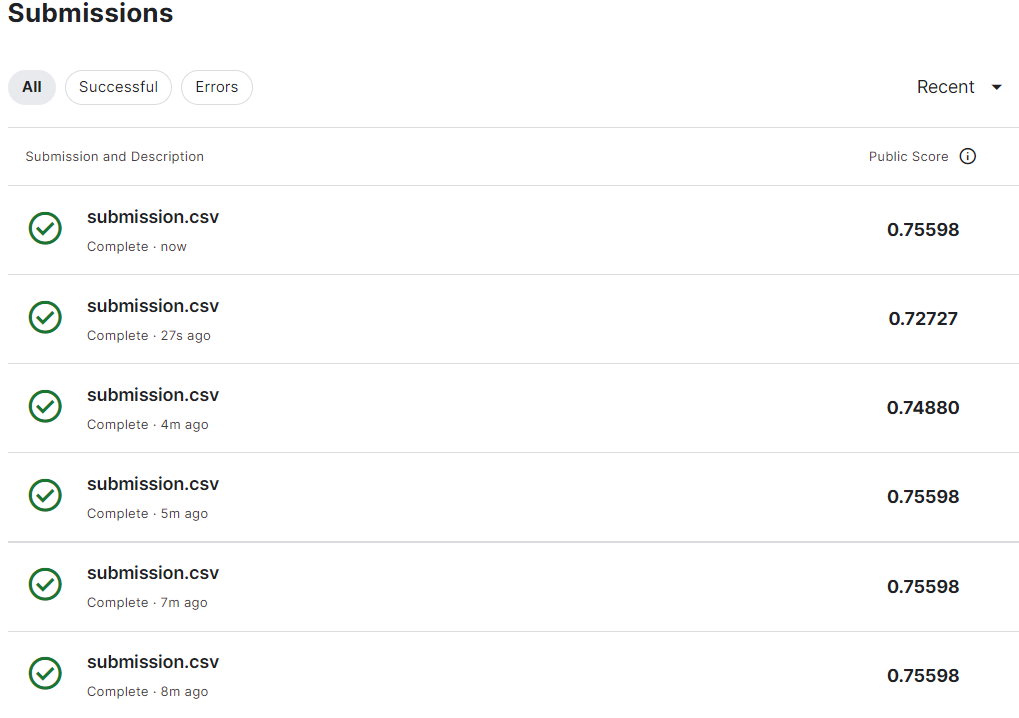

## Summery

We investigated feature selection to identify the most informative features for predicting survival outcomes.

We compared Backward Feature Selection (BFS) and Forward Feature Selection (FFS).

While the difference in performance was minimal, BFS resulted in a richer set of 6 features compared to FFS's 3. We opted for BFS for potentially better prediction power.

Next, we employed Grid Search to optimize the hyperparameters for each model.

We evaluated each model's performance using cross-validation and accuracy metrics, along with confusion matrices, KPIs, and graphs. This analysis revealed the ada_boost_model as the best performing model.

Finally, we trained the ada_boost_model using the features identified by BFS (X_selected_features_BW) to prepare it for predicting survival outcomes on new (test) data

## **References**

Course Notebooks - moodle